# **DATA EXPLORATION AND VISUALIZATION**

### **1. MỤC TIÊU**
- Trực quan hóa dữ liệu 

### **2. KHAI BÁO CÁC THƯ VIỆN**
- **sys**: làm việc với các tham số dòng lệnh 
- **os**: tương tác với hệ điều hành (file, thư mục, đường dẫn)
- **pandas**: xử lý và phân tích dữ liệu dạng bảng

In [4]:
import sys
import os
import pandas as pd
import mplcursors
from pathlib import Path
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


### **3. IMPORT CÁC HÀM TỪ SRC VÀO**
- Lấy đường dẫn thư mục hiện tại
- Import các hàm từ các file .py trong thư mục src 


In [3]:
# Lấy đường dẫn thư mục hiện tại
project_root = os.path.abspath('..')
src_path = os.path.join(project_root, 'src')
data_path = os.path.join(project_root, 'data')
charts_dir = os.path.join(project_root, 'charts')
os.makedirs(charts_dir, exist_ok=True)
project_root_new = Path("..")
if src_path not in sys.path:
    sys.path.append(src_path)

# Tự động load lại code nếu bạn có sửa file .py trong src 
%reload_ext autoreload
%autoreload 2

# Import hàm từ file .py trong thư mục src
try:  
    from calculate_average_score import calculate_average_score, visualize_average_score_ranking
    from calculate_average_score import create_ranking_journey_table, visualize_ranking_journey, clean_rank_to_int
    print('Import các hàm từ {calculate_average_score} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")

try: 
    from so_sanh_pho_diem_theo_khoi_19_24 import load_score_files, load_combinations, calc_combination_scores, build_all_counts, plot_and_save_khoi 
    print('Import các hàm từ {so_sanh_pho_diem_theo_khoi_19_24} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")

try: 
    from compare_average_scores_provinces import calculate_average_scores_by_subject, visualize_subject_ranking
    print('Import các hàm từ {compare_average_scores_provinces} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")

try: 
    from visualize_diem_thi import load_binned_scores, plot_subject_from_binned, plot_all_subjects_from_binned
    print('Import các hàm từ {visualize_diem_thi} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")

try: 

    from source import run_full_analysis_and_draw
    print('Import các hàm từ {source} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")   
all_subjects = ['Toán', 'Văn', 'Ngoại ngữ', 'Lí', 'Hóa', 'Sinh', 'Sử', 'Địa', 'GDCD']
danh_sach_nam = range(2019, 2025)
YEARS = [2019, 2020, 2021, 2022, 2023, 2024]
target_year = 2024
top_n = 10

Import các hàm từ {calculate_average_score} thành công
Import các hàm từ {so_sanh_pho_diem_theo_khoi_19_24} thành công
Import các hàm từ {compare_average_scores_provinces} thành công
Import các hàm từ {visualize_diem_thi} thành công
Import các hàm từ {source} thành công


### **4. TRỰC QUAN HÓA DỮ LIỆU BẢNG BIỂU ĐỒ**

### **4.1 Biểu đồ thanh ngang biểu diễn điểm thi trung bình của các tỉnh thành**

- **Câu hỏi:** Điểm trung bình của các tỉnh thành là như nhau vào mỗi năm 

- **Câu trả lời:** Chúng em muốn so sánh điểm trung bình giữa 63 tỉnh/thành theo từng năm, cho thấy sự khác biệt, mức độ đồng đều và các tỉnh có kết quả nổi bật hoặc thấp hơn mặt bằng chung.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2019...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2019_chart.png
Hoàn thành biểu đồ xếp hạng năm 2019.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2020...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2020_chart.png
Hoàn thành biểu đồ xếp hạng năm 2020.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2021...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2021_chart.png
Hoàn thành biểu đồ xếp hạng năm 2021.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2022...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2022_chart.png
Hoàn thành biểu đồ xếp hạng năm 2022.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2023...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2023_chart.png
Hoàn thành biểu đồ xếp hạng năm 2023.

📊 Bắt đầu 

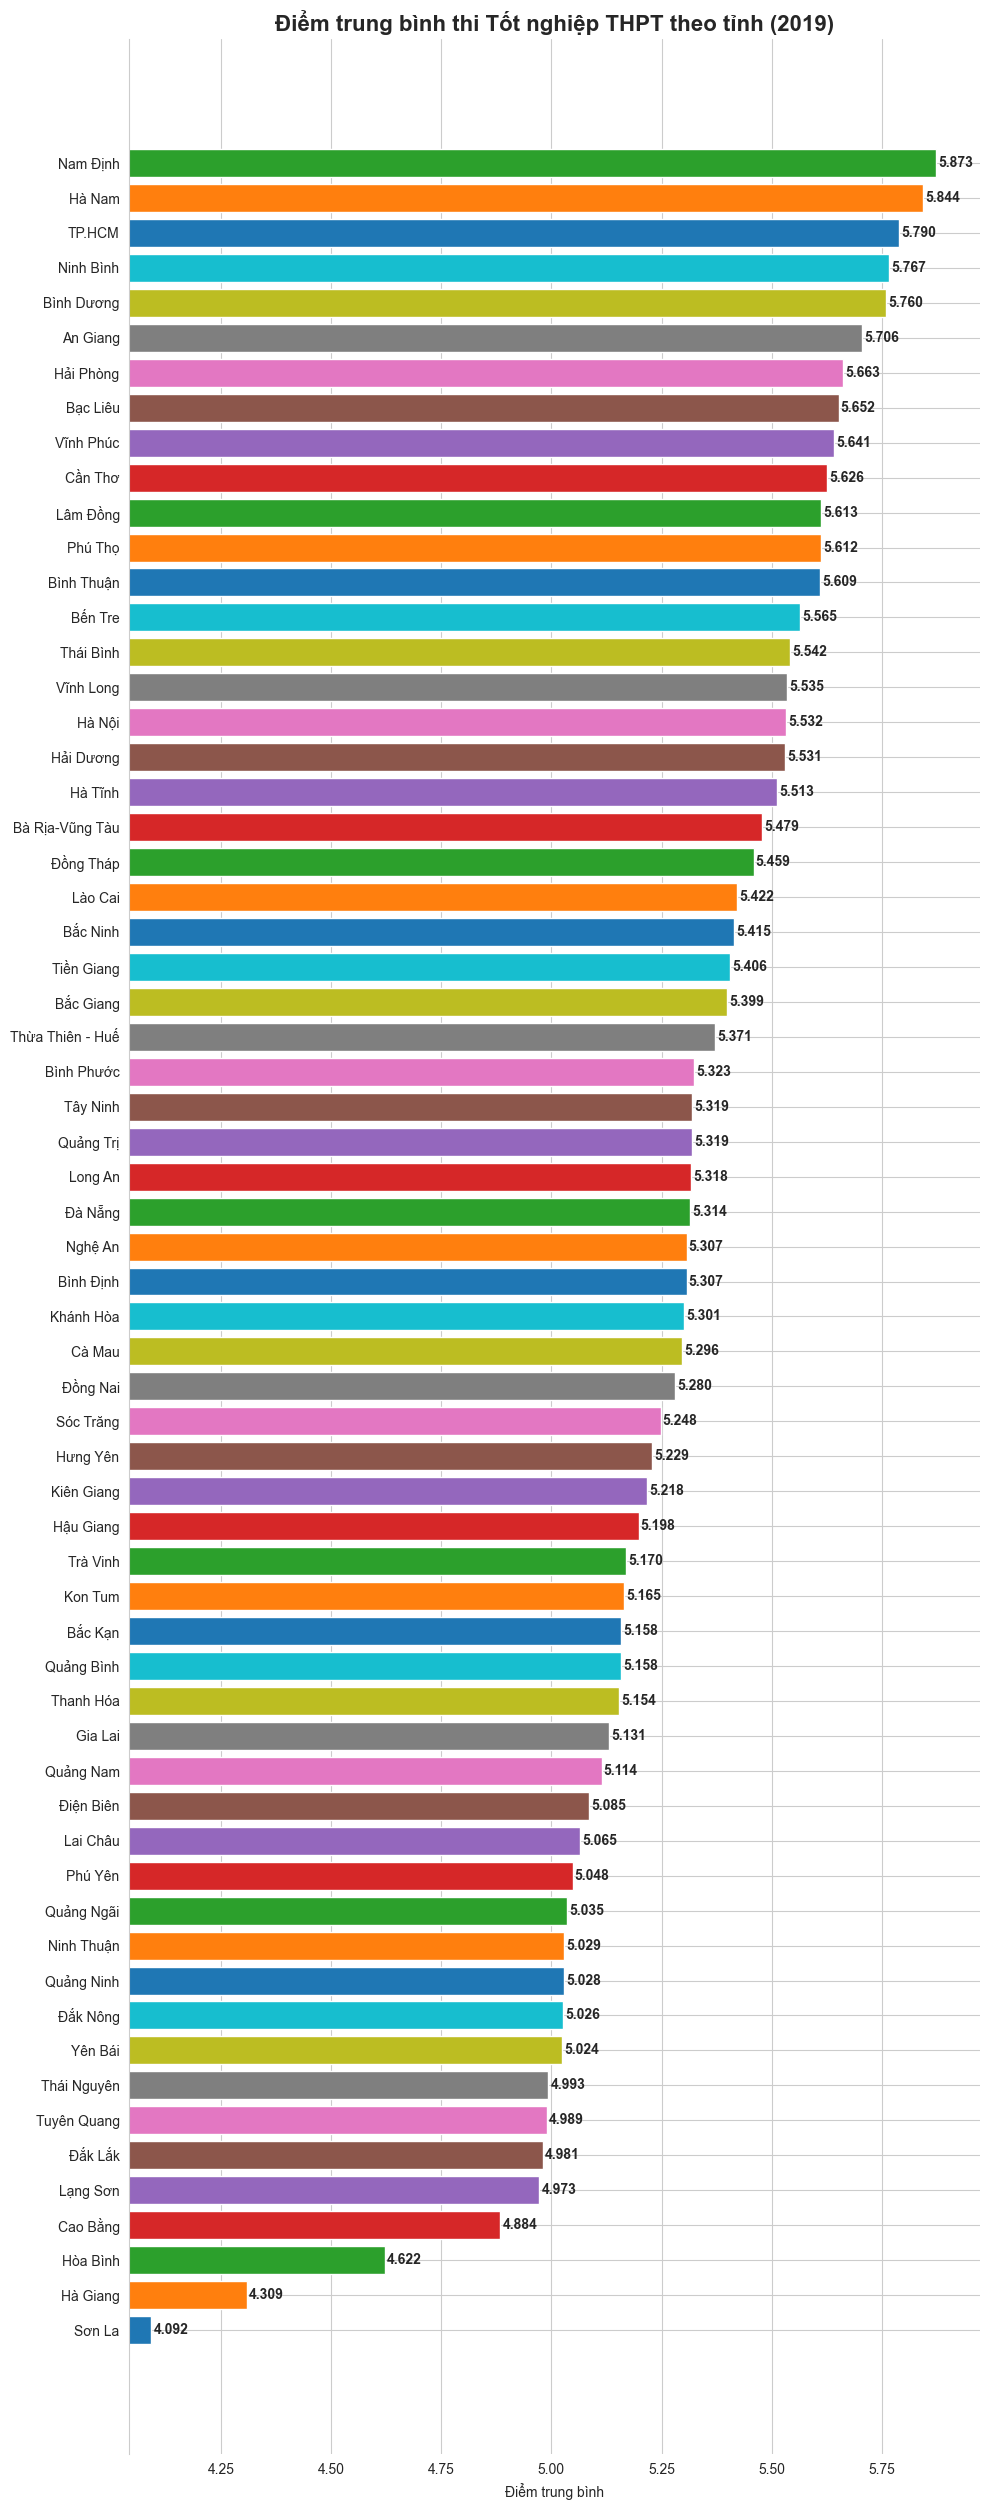

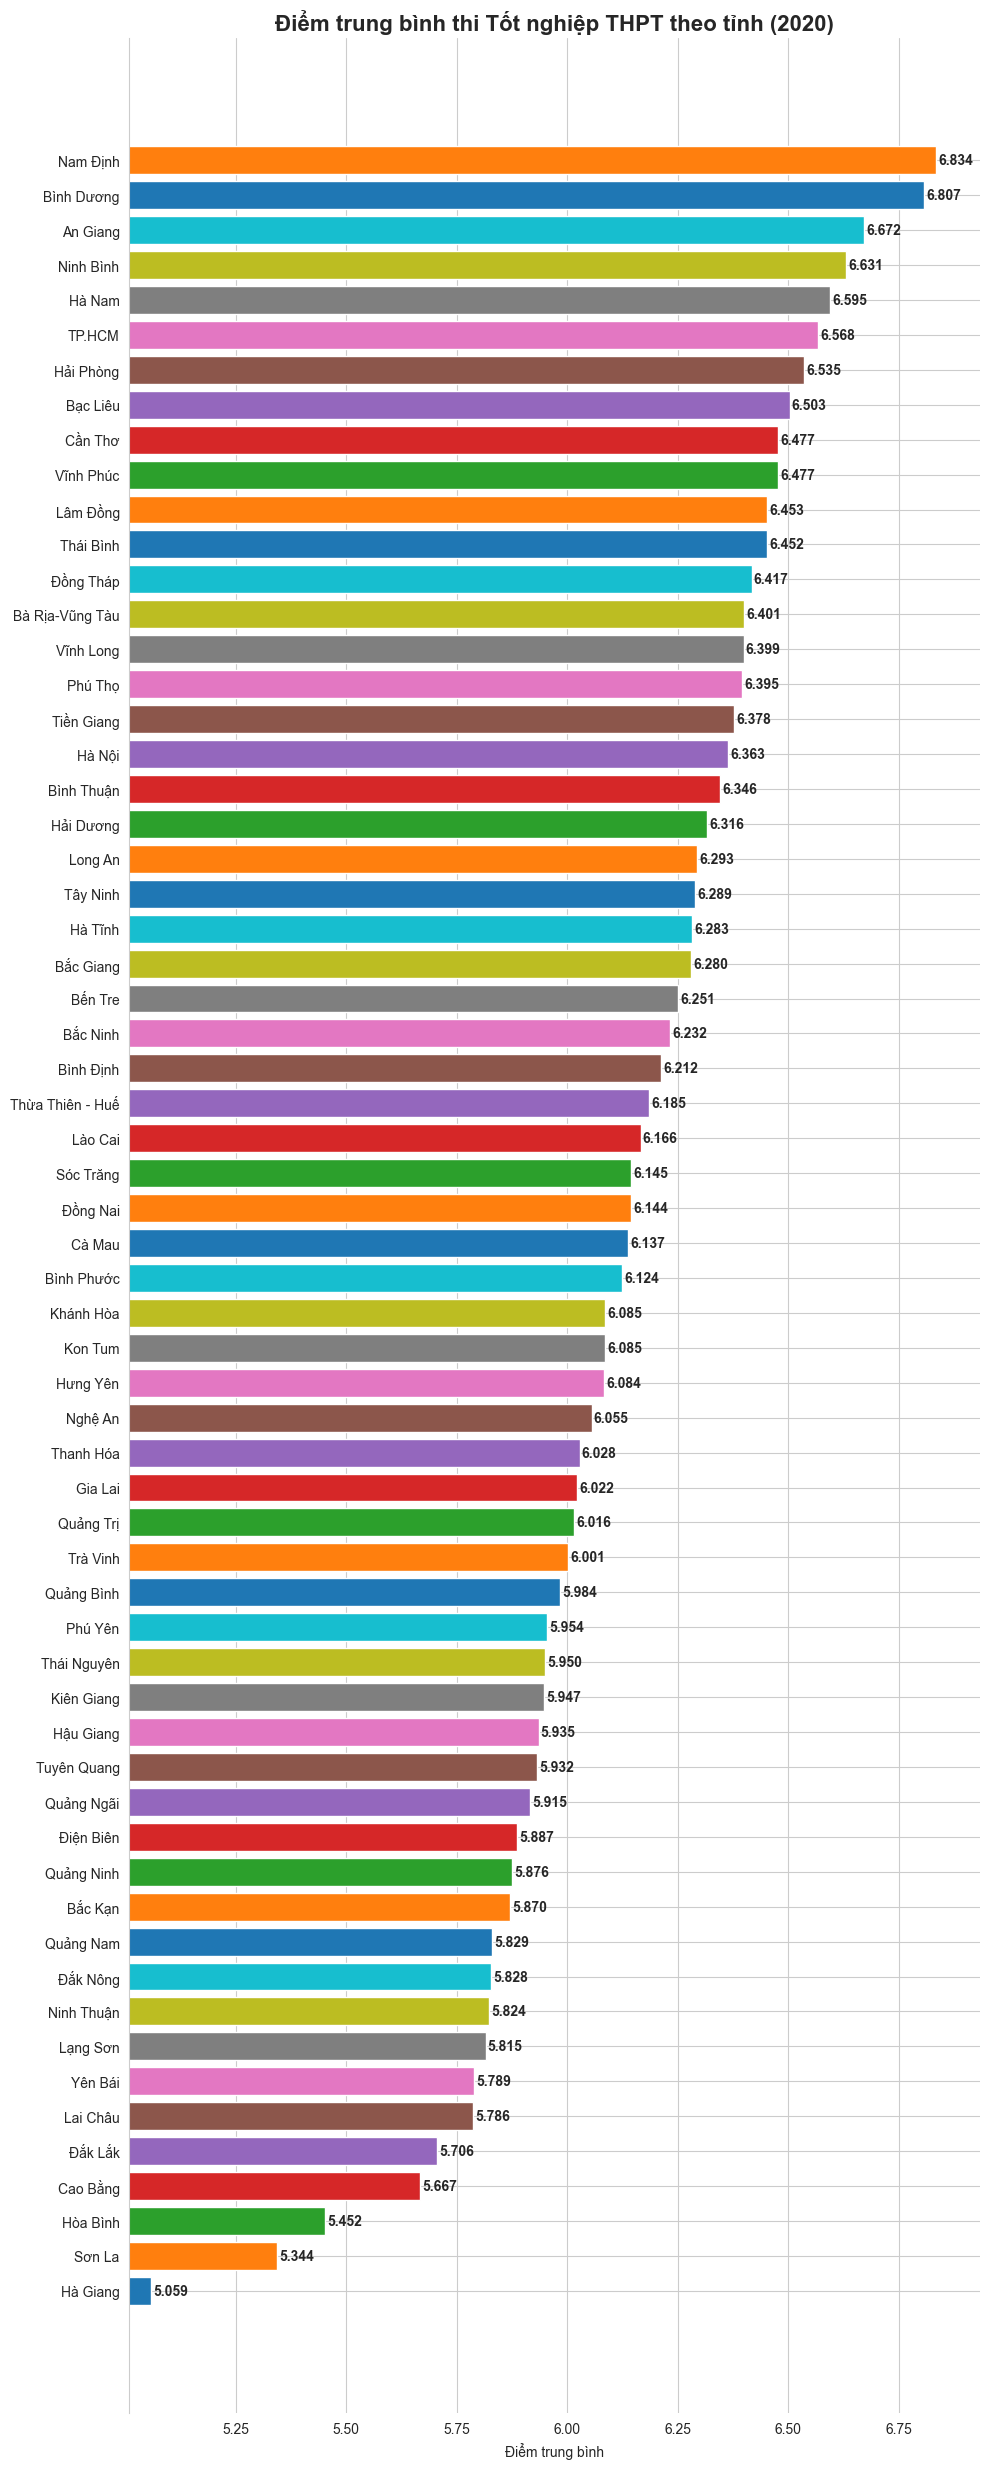

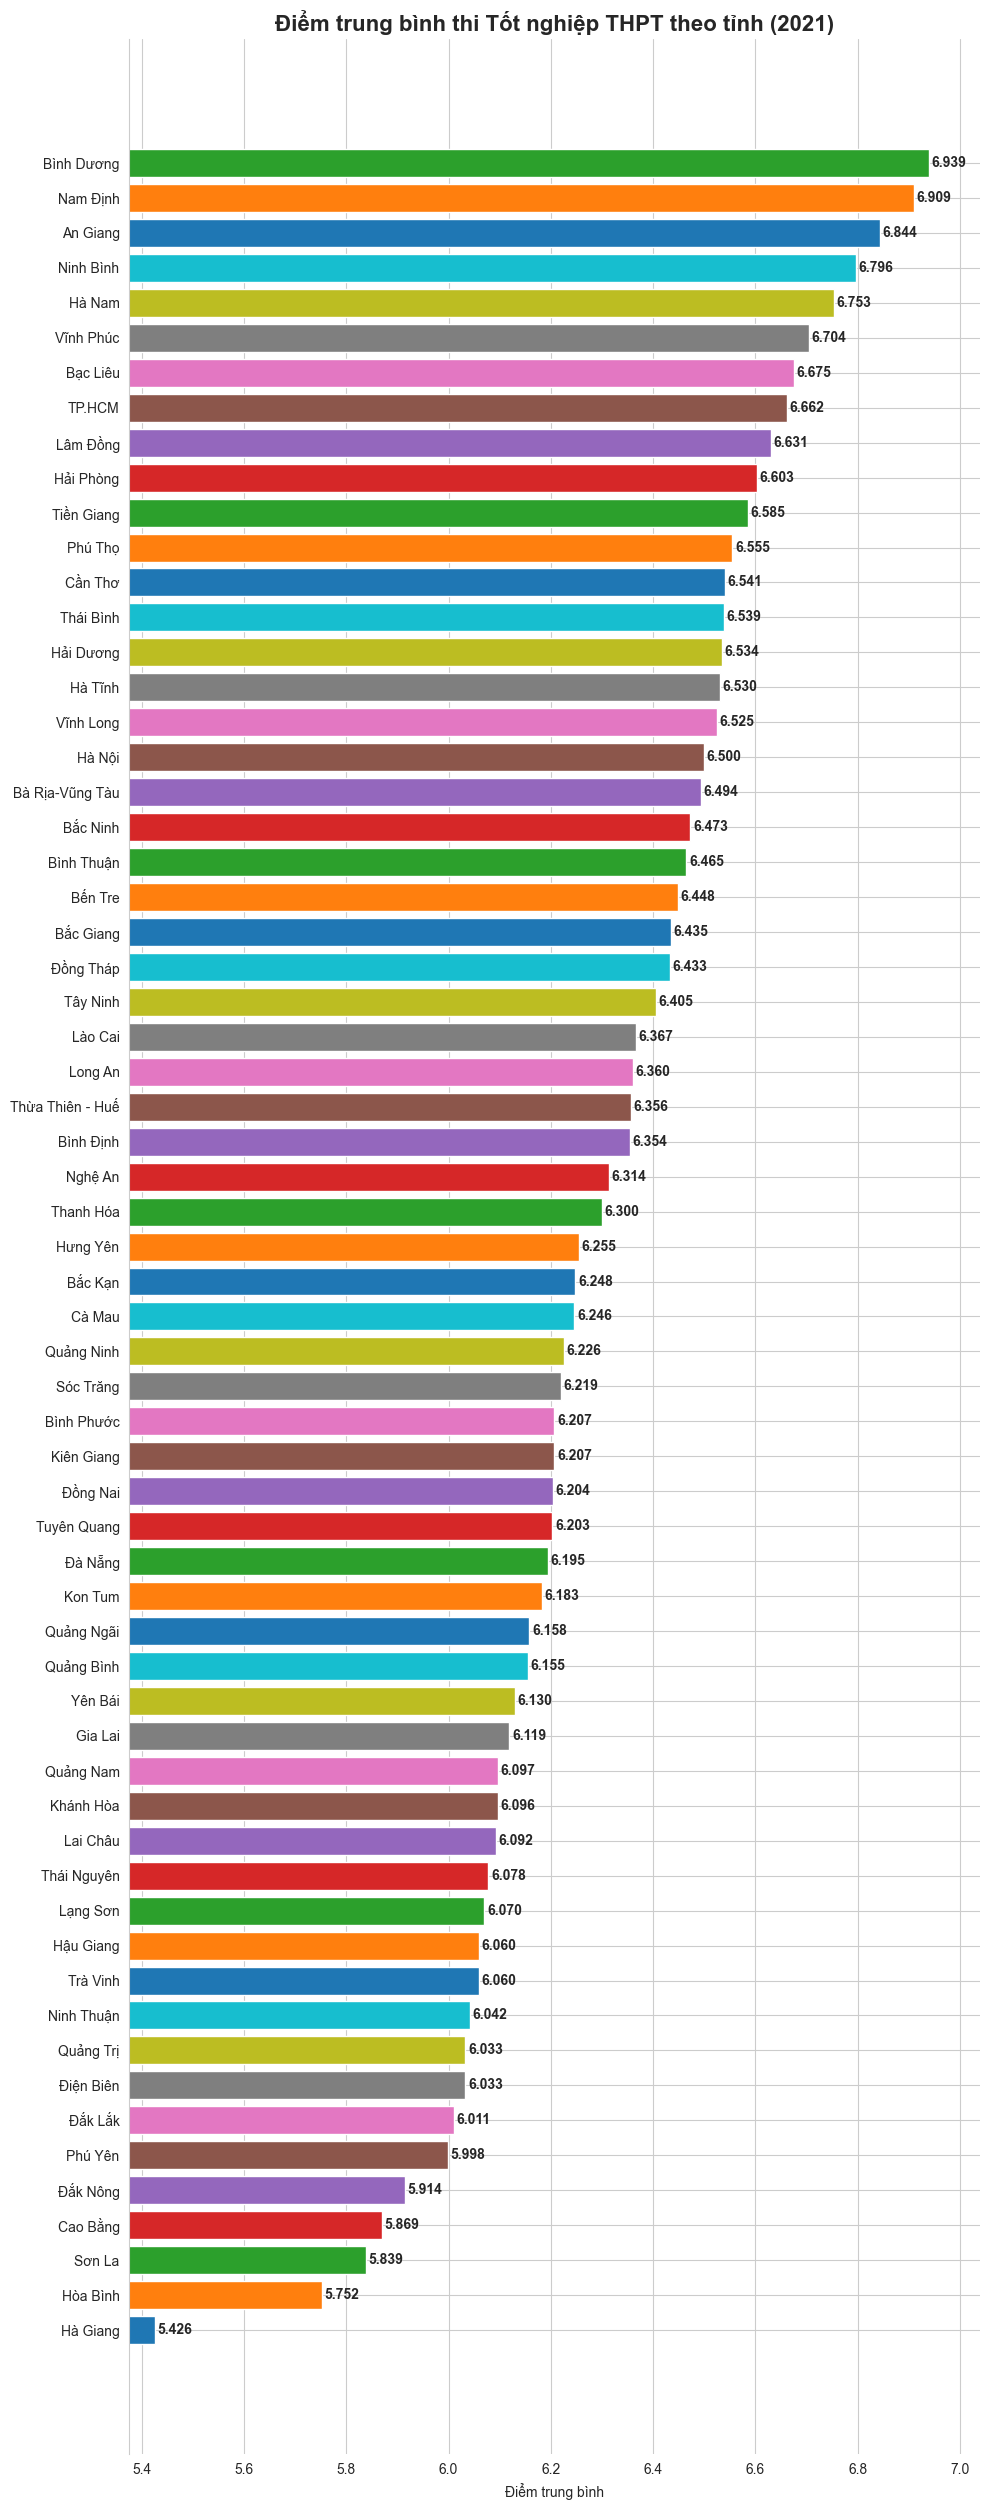

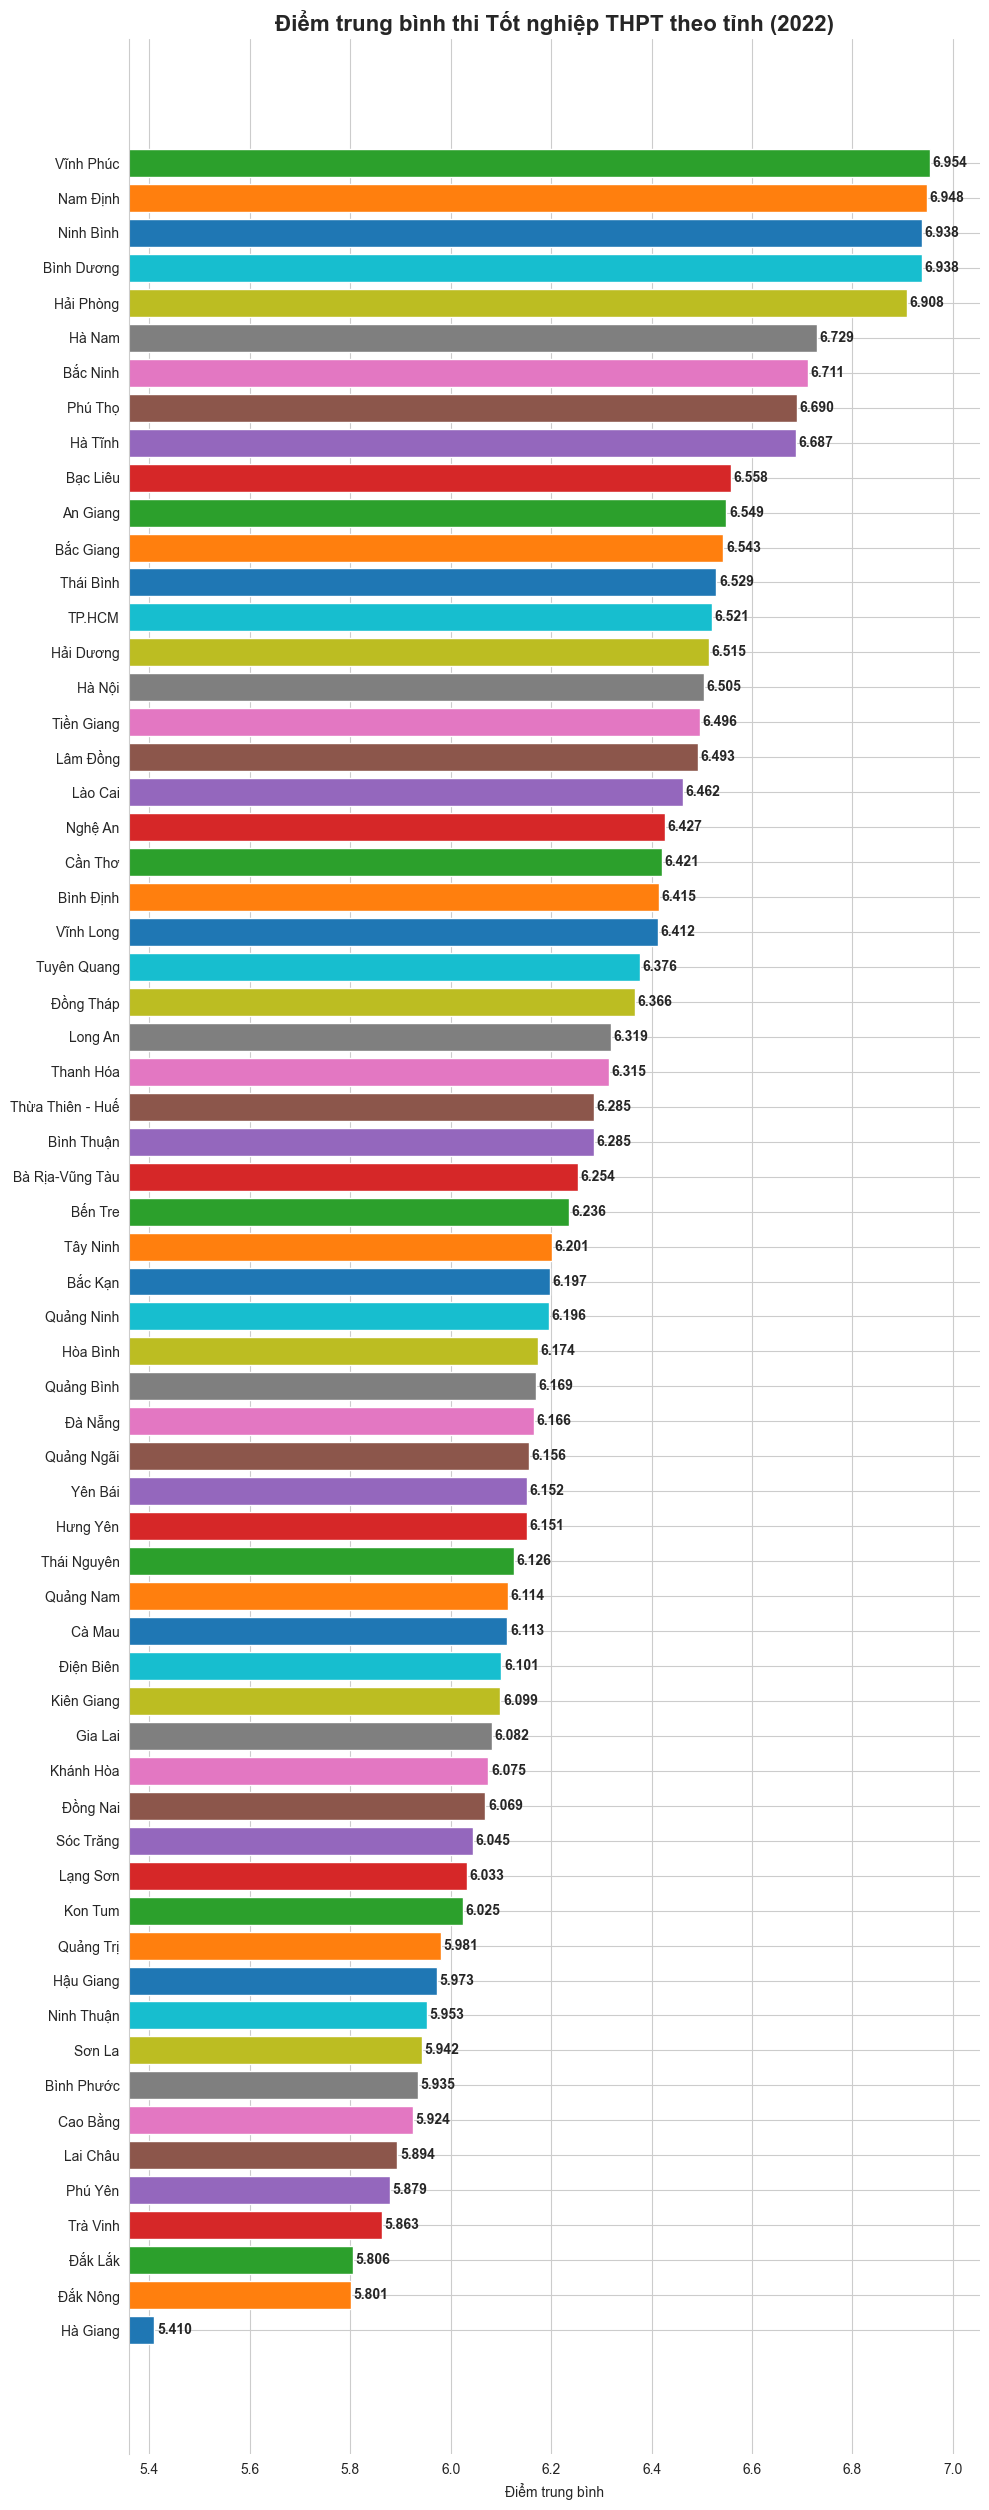

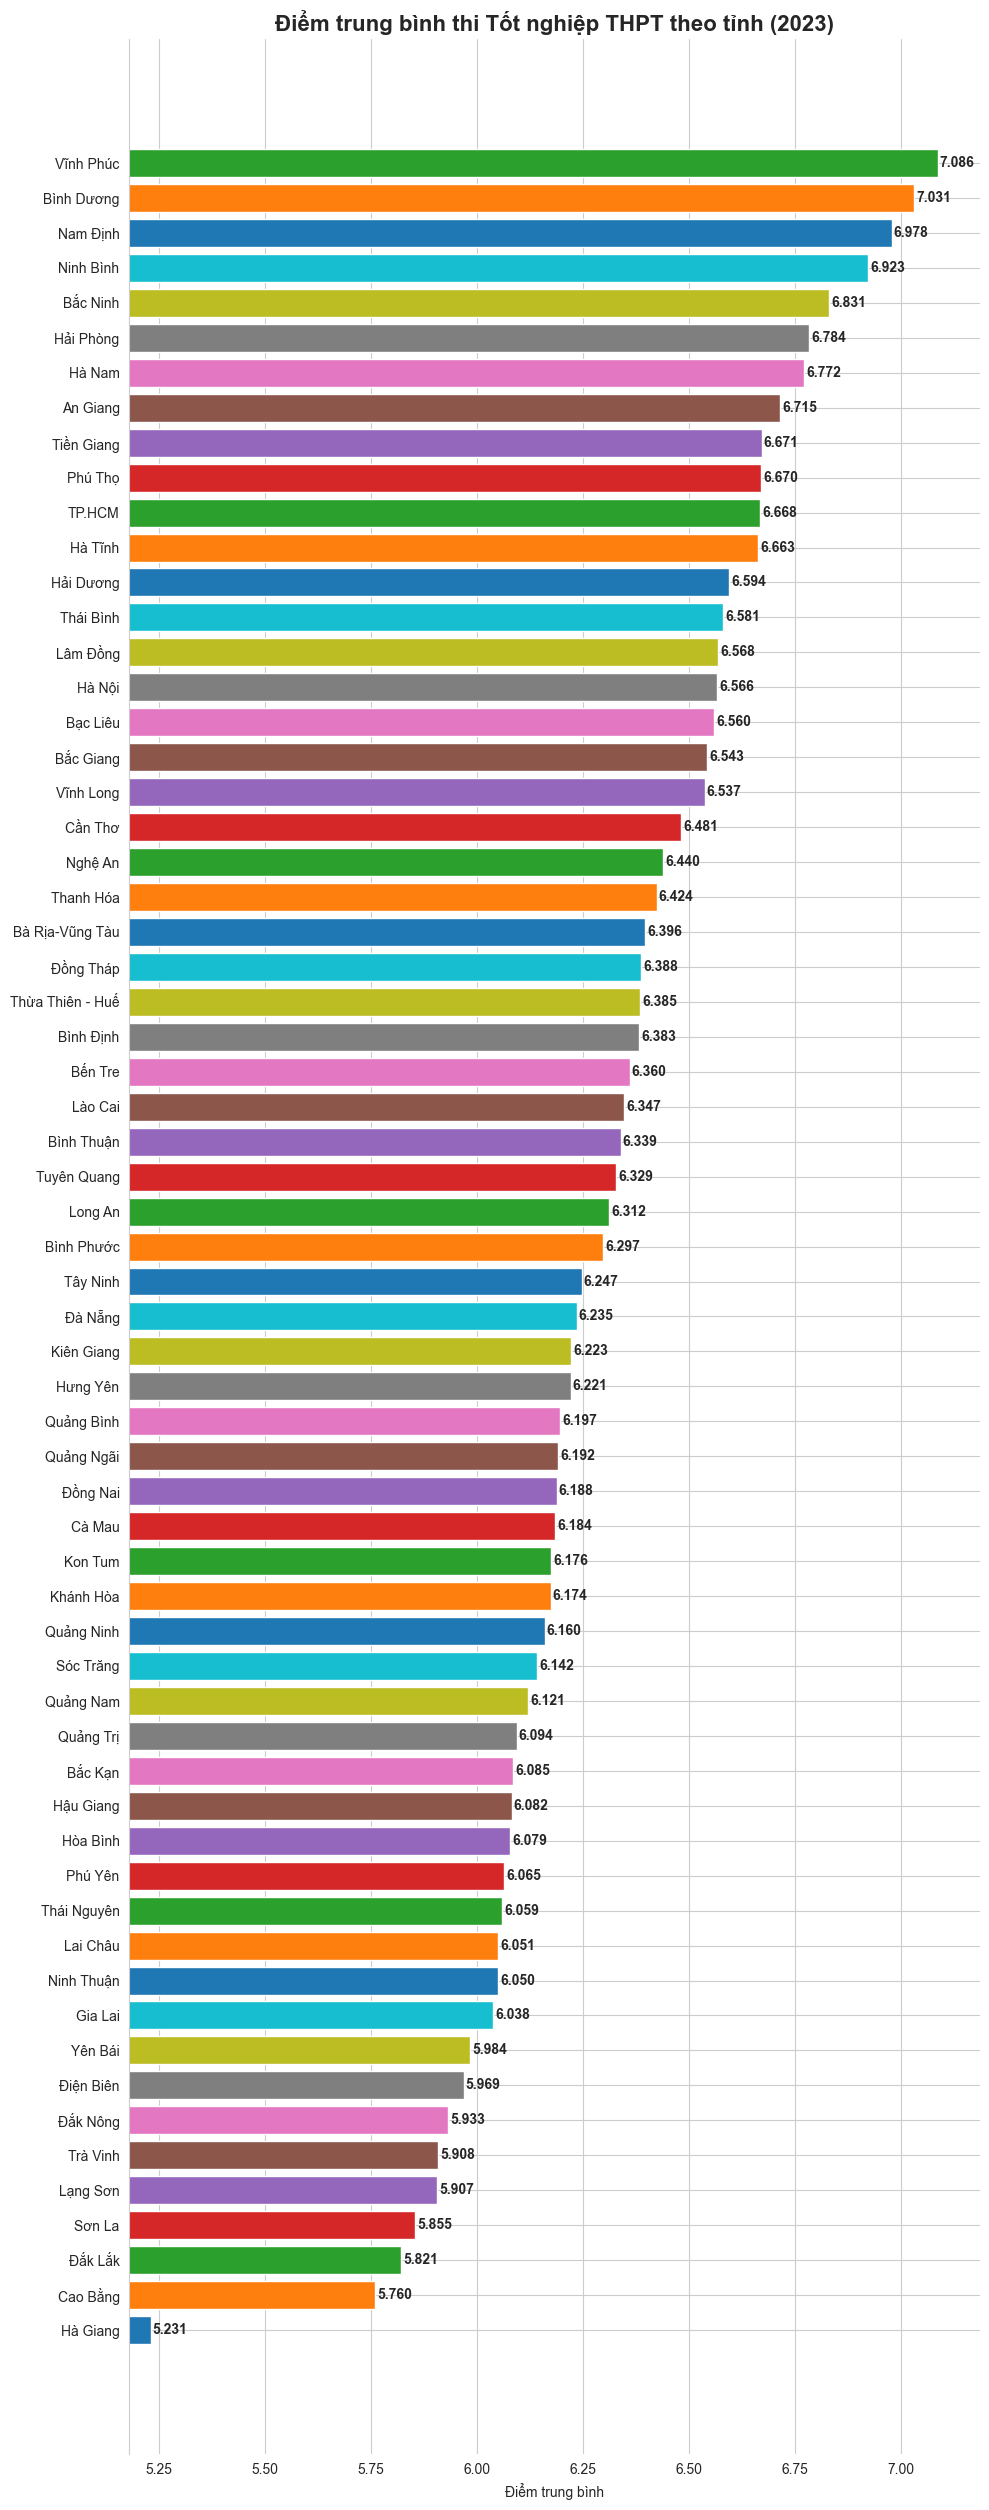

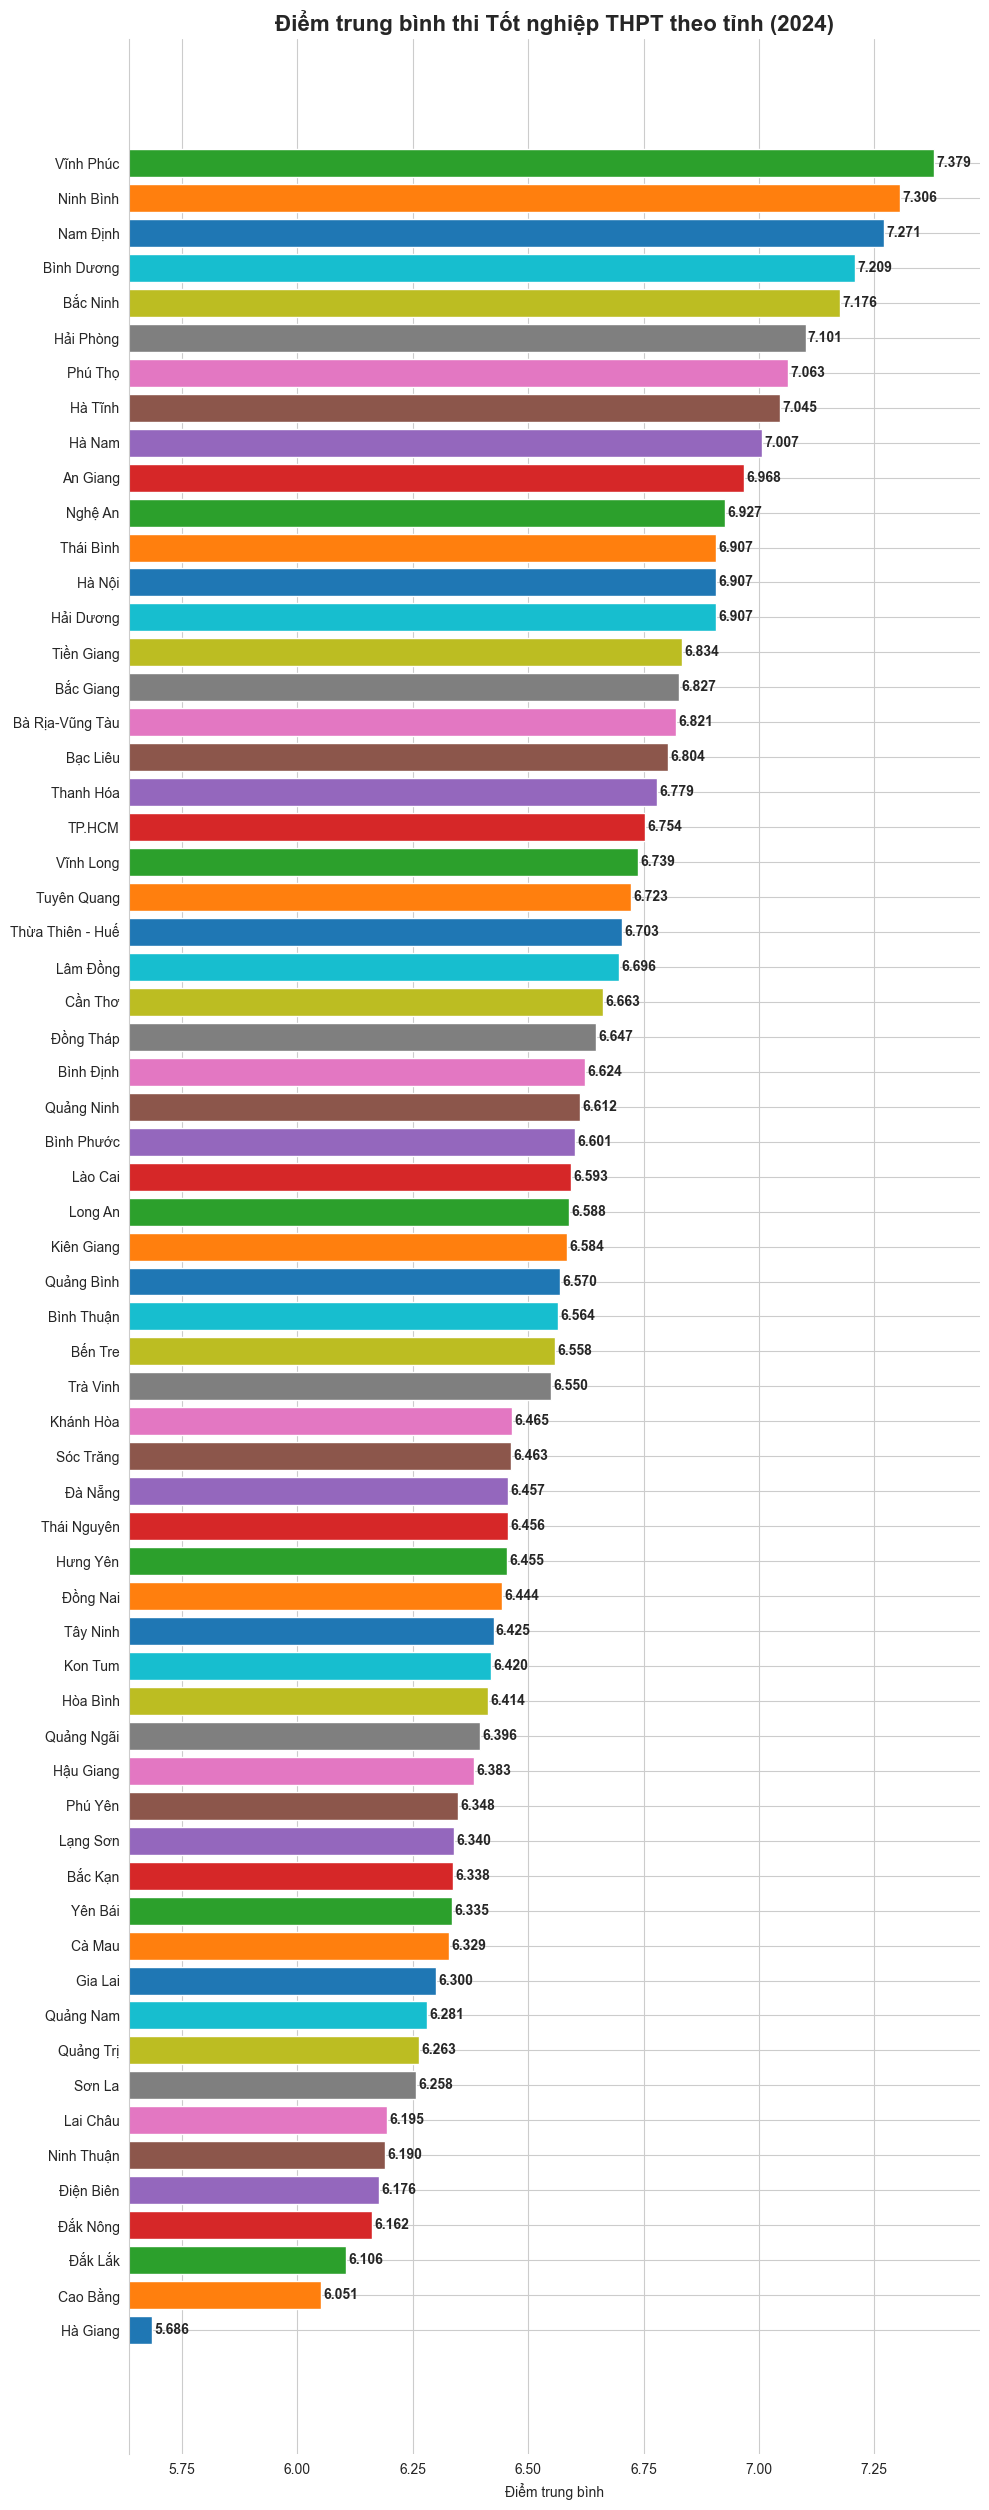

In [2]:
# --- VÒNG LẶP TÍNH TOÁN VÀ VISUALIZATION XẾP HẠNG TỪNG NĂM (63 TỈNH) ---
for nam in danh_sach_nam:
    # Tạo đường dẫn trỏ sang thư mục data
    path_csv = os.path.join(project_root, 'data', f'diem_thi_toan_quoc_{nam}.csv')
    path_json = os.path.join(project_root, 'data', 'ma_tinh.json')
    path_res_csv = os.path.join(project_root, 'data',f'diem_trung_binh_{nam}.csv' )
    path_res_png = os.path.join(charts_dir, f'ranking_{nam}_chart.png' )

    if os.path.exists(path_csv):
        
        # 1. TÍNH TOÁN 
        if not os.path.exists(path_res_csv):
            print(f"⏳ Tính toán Điểm TB năm {nam}...")
            # calculate_average_score(nam_thi=nam, file_input=path_csv, file_output = path_res_csv, file_tinh=path_json)
        
        # 2. GỌI HÀM VISUALIZATION (Vẽ biểu đồ xếp hạng từng năm)
        if os.path.exists(path_res_csv):
            print(f"📊 Bắt đầu tạo biểu đồ xếp hạng cho năm {nam}...")
            visualize_average_score_ranking(
                file_input_csv=path_res_csv, 
                nam_thi=nam, 
                file_output_png=path_res_png
            )
            print(f"Hoàn thành biểu đồ xếp hạng năm {nam}.\n")
        else:
            print(f"⚠️ Không thể tạo biểu đồ năm {nam} vì thiếu file CSV đã tính toán.")
            
    else:
        print(f"⚠️ Không tìm thấy file dữ liệu gốc năm {nam} tại: {path_csv}")

print("✅ Hoàn tất Visualization Xếp hạng Từng năm (63 tỉnh).")

### **4.2 Biểu đồ top 10 tỉnh thành có thứ hạng cao từ năm 2019->2024**

- **Câu hỏi:** Thứ hạng của 10 tỉnh/thành có điểm trung bình cao nhất thay đổi như thế nào qua các năm (2019–2024)?
- **Ý nghĩa:** Biểu đồ giúp theo dõi sự lên xuống thứ hạng của Top 10 tỉnh/thành điểm cao nhất qua các năm và cho thấy tỉnh nào giữ phong độ, tỉnh nào tăng/giảm mạnh.

--- TOP 10 CAO NHẤT (Rank 1 -> 10) ---


Tỉnh/Thành phố  Thứ hạng 2019  Thứ hạng 2020  Thứ hạng 2021  Thứ hạng 2022  \
0      Vĩnh Phúc              9             10              6              1   
1      Ninh Bình              4              4              4              3   
2       Nam Định              1              1              2              2   
3     Bình Dương              5              2              1              4   
4       Bắc Ninh             23             26             20              7   
5      Hải Phòng              7              7             10              5   
6        Phú Thọ             12             16             12              8   
7        Hà Tĩnh             19             23             16              9   
8         Hà Nam              2              5              5              6   
9       An Giang              6              3              3             11   

   Thứ hạng 2023  Thứ hạng 2024  
0              1              1  
1              4              2  
2              3              3  
3              2              4  
4              5              5  
5              6              6  
6             10              7  
7             12              8  
8              7              9  
9              8             10

📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Cao nhất...
Đã tạo biểu đồ hành trình: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\top10_best_journey.png


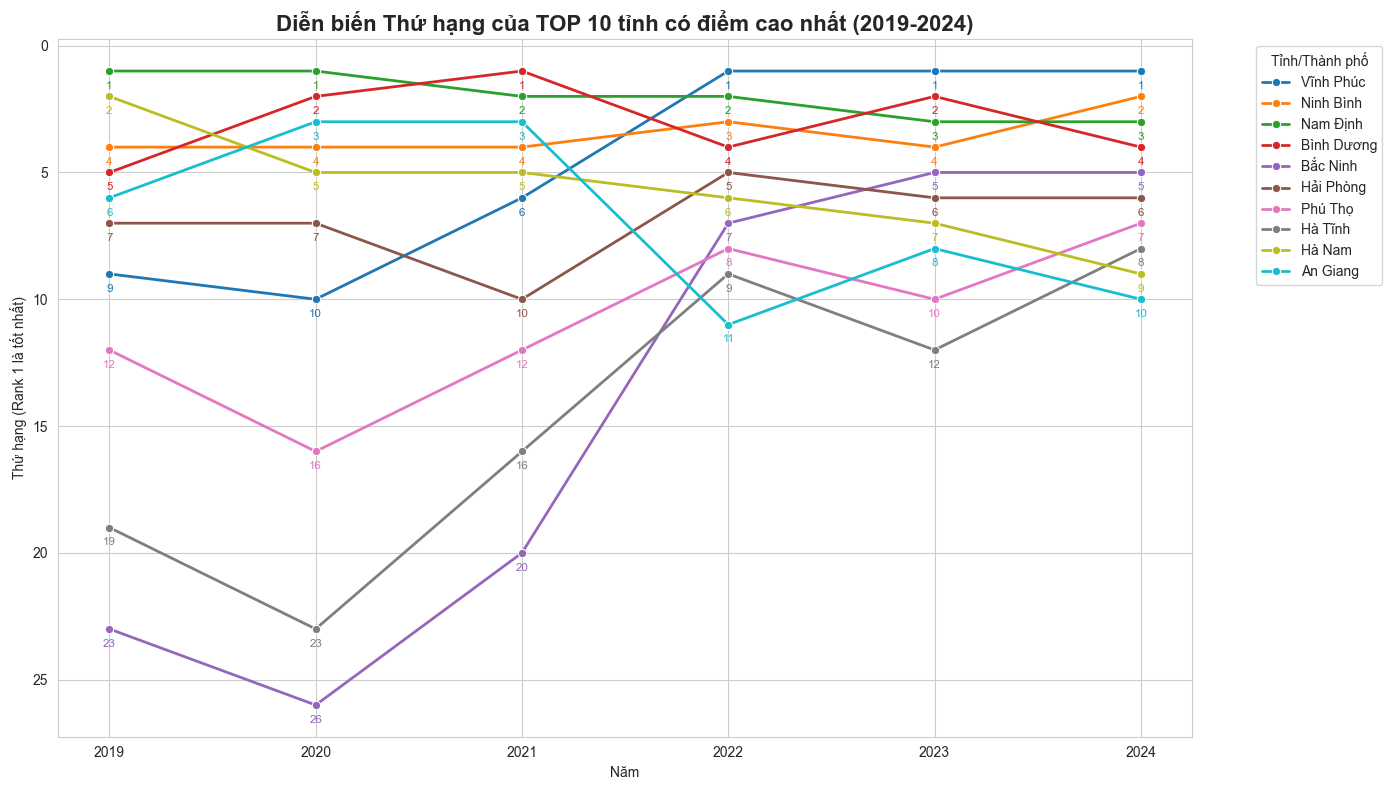

✅ Hoàn tất biểu đồ Hành trình Top 10 Cao nhất.


In [2]:
# Lấy Top 10 tỉnh có điểm cao nhất (Rank thấp nhất)
df_top_best = create_ranking_journey_table(
    project_root=project_root,
    list_years=danh_sach_nam,
    target_year=target_year,
    top_n=10,
    is_top_n_best=True
)

# Xóa Index thừa và hiển thị
df_top_best = df_top_best.reset_index(drop=True)

# Loại bỏ cột Index cũ nếu nó bị giữ lại dưới dạng cột không tên
if df_top_best.columns[0] != 'Tỉnh/Thành phố':
    df_top_best = df_top_best.iloc[:, 1:]
    
df_top_best_clean = clean_rank_to_int(df_top_best)
print("--- TOP 10 CAO NHẤT (Rank 1 -> 10) ---")
display(df_top_best_clean)

# Visualization Hành trình Thứ hạng
custom_title_1 = "Diễn biến Thứ hạng của TOP 10 tỉnh có điểm cao nhất (2019-2024)"
file_path_best = os.path.join(charts_dir, 'top10_best_journey.png')

print("📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Cao nhất...")
visualize_ranking_journey(
    df_ranking_journey=df_top_best,
    custom_title=custom_title_1,
    file_output_png=file_path_best
)
print("✅ Hoàn tất biểu đồ Hành trình Top 10 Cao nhất.")

### **4.3 Biểu đồ top 10 tỉnh thành có thứ hạng thấp từ năm 2019->2024**

- **Câu hỏi:** Thứ hạng của 10 tỉnh/thành có điểm trung bình thấp nhất thay đổi như thế nào qua các năm (2019–2024)?
- **Ý nghĩa:** Biểu đồ cho thấy sự thay đổi thứ hạng của 10 tỉnh có điểm trung bình thấp nhất qua các năm, giúp nhận ra tỉnh nào cải thiện và tỉnh nào tiếp tục xếp cuối bảng.

--- TOP 10 THẤP NHẤT (Rank 54 -> 63) ---


Tỉnh/Thành phố  Thứ hạng 2019  Thứ hạng 2020  Thứ hạng 2021  Thứ hạng 2022  \
0       Hà Giang             62             62             63             63   
1       Cao Bằng             60             59             60             57   
2        Đắk Lắk             58             58             57             61   
3       Đắk Nông             54             53             59             62   
4      Điện Biên             48             49             56             44   
5     Ninh Thuận             52             54             54             54   
6       Lai Châu             49             57             49             58   
7         Sơn La             63             61             61             55   
8      Quảng Trị             29             40             55             52   
9      Quảng Nam             47             52             47             42   

   Thứ hạng 2023  Thứ hạng 2024  
0             63             63  
1             62             62  
2             61             61  
3             57             60  
4             56             59  
5             53             58  
6             52             57  
7             60             56  
8             46             55  
9             45             54

📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Thấp nhất...
Đã tạo biểu đồ hành trình: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\top10_worst_journey.png


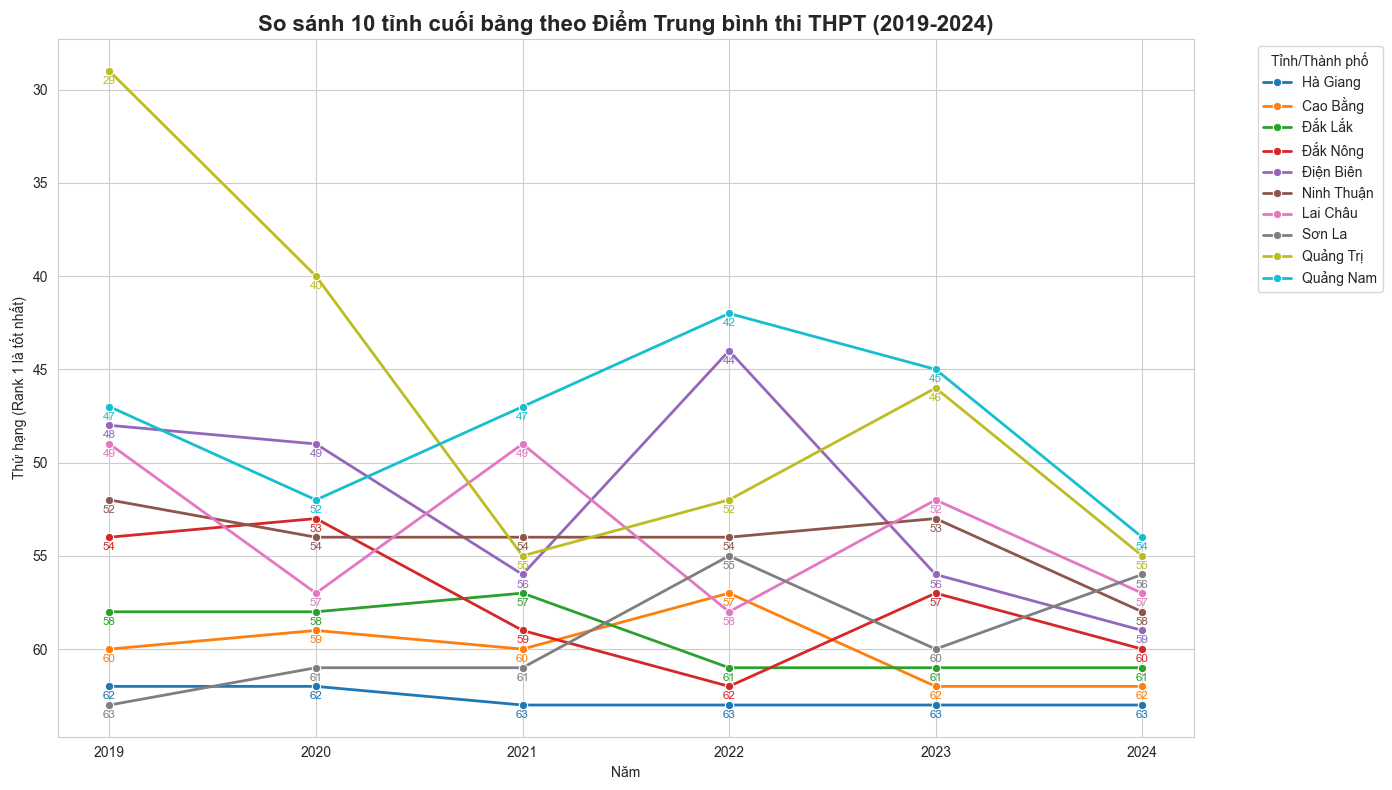

✅ Hoàn tất biểu đồ Hành trình Top 10 Thấp nhất.

🎉 Toàn bộ quy trình đã hoàn tất!


In [3]:
# Lấy Top 10 tỉnh có điểm thấp nhất (Rank cao nhất)
df_top_worst = create_ranking_journey_table(
    project_root=project_root,
    list_years=danh_sach_nam,
    target_year=target_year,
    top_n=10,
    is_top_n_best=False 
)

# Xóa Index thừa và hiển thị
df_top_worst = df_top_worst.reset_index(drop=True)

# Loại bỏ cột Index cũ nếu nó bị giữ lại dưới dạng cột không tên
if df_top_worst.columns[0] != 'Tỉnh/Thành phố':
    df_top_worst = df_top_worst.iloc[:, 1:]
    
df_top_worst_clean = clean_rank_to_int(df_top_worst)
print("--- TOP 10 THẤP NHẤT (Rank 54 -> 63) ---")
display(df_top_worst_clean)

# Visualization Hành trình Thứ hạng
custom_title_2 = "So sánh 10 tỉnh cuối bảng theo Điểm Trung bình thi THPT (2019-2024)"
file_path_worst = os.path.join(charts_dir, 'top10_worst_journey.png')

print("📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Thấp nhất...")
visualize_ranking_journey(
    df_ranking_journey=df_top_worst,
    custom_title=custom_title_2,
    file_output_png=file_path_worst
)
print("✅ Hoàn tất biểu đồ Hành trình Top 10 Thấp nhất.")

print("\n🎉 Toàn bộ quy trình đã hoàn tất!")

### **4.4 Biểu so sánh điểm các khối thi năm 2019->2024**
- **Câu hỏi:** Độ phân hóa của đề thi qua các năm có ổn định không, hay có năm nào đề quá dễ/quá khó khiến phổ điểm bị lệch hẳn về một phía?
- **Ý nghĩa:** Dự báo điểm chuẩn Đại học: Sự dịch chuyển của phổ điểm là chỉ báo quan trọng nhất để dự đoán điểm chuẩn. Nếu đường phổ điểm dịch sang phải (điểm cao hơn), điểm chuẩn năm đó chắc chắn sẽ tăng và ngược lại.

In [8]:
import sys
import os
import mplcursors
import pandas as pd
from pathlib import Path

# Cấu hình đường dẫn để tìm thấy thư mục 'src'
current_dir = Path.cwd()
PROJECT_ROOT = current_dir.parent  # Lùi ra 1 cấp để thấy folder src

if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

# Import các hàm từ file src/...
from src.so_sanh_pho_diem_theo_khoi_19_24 import (
    load_score_files,
    load_combinations,
    calc_combination_scores,
    build_all_counts,
    plot_and_save_khoi
)

# BƯỚC 3: Chạy code chính của bạn

# 1. Thiết lập tham số
# Dùng PROJECT_ROOT để đường dẫn chính xác tuyệt đối
DATA_DIR = PROJECT_ROOT / "data"
JSON_PATH = DATA_DIR / "to_hop.json"
SAVE_DIR = PROJECT_ROOT / "charts" / "so_sanh_pho_diem_theo_khoi"

YEARS = [2019, 2020, 2021, 2022, 2023, 2024]
TARGET_KHOI = ["A00", "A01", "B00", "C00", "D01", "D07"]

# 2. Đọc dữ liệu
print("\n=== BẮT ĐẦU QUY TRÌNH ===")
# Chuyển Path object sang string vì hàm load_score_files của bạn có thể dùng os.path.join
df = load_score_files(str(DATA_DIR), years=YEARS)


# 3. Load tổ hợp và tính toán
combo = load_combinations(str(JSON_PATH))
print("✔ Đã load file JSON tổ hợp.")

print("⏳ Đang tính điểm tổ hợp (có thể mất vài giây)...")
pho_diem = calc_combination_scores(df, combo)

print("⏳ Đang thống kê số lượng theo mốc điểm...")
count_table = build_all_counts(pho_diem)

# 4. Vẽ biểu đồ
print("=== ĐANG VẼ BIỂU ĐỒ ===")
for khoi in TARGET_KHOI:
    if khoi in combo:
        plot_and_save_khoi(count_table, khoi, str(SAVE_DIR))
    else:
        print(f"[Cảnh báo] Khối {khoi} không có trong file cấu hình JSON.")


=== BẮT ĐẦU QUY TRÌNH ===
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2019_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2020_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2021_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2022_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2023_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2024_new.csv
✔ Đã load file JSON tổ hợp.
⏳ Đang tính điểm tổ hợp (có thể mất vài giây)...
⏳ Đang thống kê số lượng theo mốc điểm...
=== ĐANG VẼ BIỂU ĐỒ ===
✔ Đã lưu biểu đồ: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\charts\so_sanh_pho_diem_theo_khoi\khoi_A00.png
✔ Đã lưu biểu đồ: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-sci

### **4.5 Biểu đồ thanh ngang biểu diễn điểm thi trung bình của các môn**

- **Câu hỏi:** Điểm trung bình của các môn là khác nhau ở các tỉnh
- **Ý nghĩa:** Giúp chúng em nhận xét được điểm trung bình của từng môn hầu như là khác nhau ở các tỉnh thành khác nhau. Điều này chứng tỏ rằng sự khác biệt về kết quả học tập ở các địa phương là rất lớn. 

### **Lưu ý: Xem biểu đồ ở thư mục Chart (vì có nhiều biểu đồ nên không biểu diễn trong Notebook)**

In [7]:
print(f"--- BẮT ĐẦU XỬ LÝ VÀ VISUALIZATION ĐIỂM TB TỪNG MÔN QUA NHIỀU NĂM ---")

# --- 4. VÒNG LẶP XỬ LÝ (NĂM VÀ MÔN HỌC) ---

for nam in danh_sach_nam:
    nam_str = str(nam)
    # --- Thiết lập Đường dẫn ---
    path_csv_input = os.path.join(project_root, 'data', f'diem_thi_toan_quoc_{nam_str}.csv')
    path_json_tinh = os.path.join(project_root, 'data', 'ma_tinh.json')
    path_res_csv = os.path.join(project_root, 'data', f'diem_tb_mon_{nam_str}.csv')

    if os.path.exists(path_csv_input):
        
        df_mon = None # Khởi tạo DataFrame điểm TB môn của năm hiện tại
        
        # 1. TÍNH ĐIỂM TRUNG BÌNH TỪNG MÔN (Nếu file kết quả chưa tồn tại)
        if not os.path.exists(path_res_csv):
            print(f"\n⏳ Tính Điểm TB Từng Môn năm {nam_str}...")
            # Hàm trả về DataFrame KHÔNG CÓ NĂM trong tên cột
            df_mon = calculate_average_scores_by_subject(
                nam_thi=nam_str, 
                file_input=path_csv_input, 
                file_output=path_res_csv,
                file_tinh=path_json_tinh
            )
        else:
            # Nếu đã tồn tại, ĐỌC FILE VÀ LÀM SẠCH TÊN CỘT (vì file CSV có năm)
            print(f"\n✅ Bỏ qua tính toán năm {nam_str}, đã tìm thấy file CSV: {path_res_csv}")
            try:
                df_mon_raw = pd.read_csv(path_res_csv)
                # LÀM SẠCH TÊN CỘT: Xóa phần (Năm)
                df_mon = df_mon_raw.rename(columns=lambda col: col.replace(f' ({nam_str})', '') if f' ({nam_str})' in col else col)
            except Exception as e:
                print(f"Lỗi đọc file CSV năm {nam_str}: {e}")
                continue # Bỏ qua năm này

        
        # 2. VISUALIZATION XẾP HẠNG TỪNG MÔN
        if df_mon is not None:
            print(f"\n📊 Bắt đầu tạo biểu đồ xếp hạng TỪNG MÔN năm {nam_str}...")
            
            for subject in all_subjects:
                score_col = f'Điểm TB {subject}'
                
                if score_col in df_mon.columns:
                    # Gọi hàm visualization mới
                    visualize_subject_ranking(
                        df_input=df_mon,
                        subject=subject,
                        nam_thi=nam_str,
                        output_dir=charts_dir # Lưu vào charts/YYYY/
                    )
                # else: (In thông báo bỏ qua nếu cần)

    else:
        print(f"⚠️ Không tìm thấy file dữ liệu gốc năm {nam_str} tại: {path_csv_input}")

print("\n🎉 HOÀN TẤT XỬ LÝ VÀ VISUALIZATION ĐIỂM TRUNG BÌNH TỪNG MÔN QUA NHIỀU NĂM!")

--- BẮT ĐẦU XỬ LÝ VÀ VISUALIZATION ĐIỂM TB TỪNG MÔN QUA NHIỀU NĂM ---

✅ Bỏ qua tính toán năm 2019, đã tìm thấy file CSV: d:\2025-2026-HKI\IntroduceData\FullTask\introduction-to-data-science\data\diem_tb_mon_2019.csv

📊 Bắt đầu tạo biểu đồ xếp hạng TỪNG MÔN năm 2019...
 -> Đã lưu: diem_tb_Toán.png
 -> Đã lưu: diem_tb_Văn.png
 -> Đã lưu: diem_tb_Ngoại ngữ.png
 -> Đã lưu: diem_tb_Lí.png
 -> Đã lưu: diem_tb_Hóa.png
 -> Đã lưu: diem_tb_Sinh.png
 -> Đã lưu: diem_tb_Sử.png
 -> Đã lưu: diem_tb_Địa.png
 -> Đã lưu: diem_tb_GDCD.png

✅ Bỏ qua tính toán năm 2020, đã tìm thấy file CSV: d:\2025-2026-HKI\IntroduceData\FullTask\introduction-to-data-science\data\diem_tb_mon_2020.csv

📊 Bắt đầu tạo biểu đồ xếp hạng TỪNG MÔN năm 2020...
 -> Đã lưu: diem_tb_Toán.png
 -> Đã lưu: diem_tb_Văn.png
 -> Đã lưu: diem_tb_Ngoại ngữ.png
 -> Đã lưu: diem_tb_Lí.png
 -> Đã lưu: diem_tb_Hóa.png
 -> Đã lưu: diem_tb_Sinh.png
 -> Đã lưu: diem_tb_Sử.png
 -> Đã lưu: diem_tb_Địa.png
 -> Đã lưu: diem_tb_GDCD.png

✅ Bỏ qua tí

### **4.6 Biểu đồ nhiệt so sánh số lượng và tỷ lệ thí sinh liệt qua các năm từ 2019-2024**
- **Câu hỏi:** Tình hình thí sinh bị điểm liệt (≤ 1.0 điểm) biến động như thế nào trong giai đoạn 6 năm (2019-2024)?
- **Ý nghĩa:** Việc so sánh song song giữa "Số lượng" và "Tỷ lệ" giúp đánh giá khách quan hơn.

In [7]:
YEARS = [2019, 2020, 2021, 2022, 2023,2024]  
DATA_DIR = Path("../data")           
OUTPUT_DIR = Path(project_root) / 'charts'
OUTPUT_DIR.mkdir(exist_ok=True)
CONFIG_FILE = DATA_DIR / "to_hop.json"
GEOJSON_FILE = DATA_DIR / "vn_new.json"
NGUONG_LIET = 1.0
NGUONG_TO_HOP = 12.5

GEOJSON_OLD = DATA_DIR / "vn.json"
PROVINCE_CSV = DATA_DIR / "province.csv"

for year in YEARS:
        print(f"\n========== NĂM {year} ==========")
    
        data_file = DATA_DIR / f"diem_thi_toan_quoc_{year}.csv"
        year_output_dir = OUTPUT_DIR / str(year)
        year_output_dir.mkdir(parents=True, exist_ok=True)

        if not data_file.exists():
            print(f"BỎ QUA: Không tìm thấy file {data_file.name}")
            continue

        run_full_analysis_and_draw(
            year=year,
            data_file_path=data_file,
            config_file_path=CONFIG_FILE,
            geojson_path=GEOJSON_FILE,
            output_dir=year_output_dir,
            liet_nguong=NGUONG_LIET,

            tohop_nguong=NGUONG_TO_HOP
        )

print("\n HOÀN TẤT PHÂN TÍCH TẤT CẢ CÁC NĂM")


========== NĂM 2019 ==========
Bắt đầu đọc file: diem_thi_toan_quoc_2019.csv
Đã tính toán thống kê thành công.
Đã gộp dữ liệu thống kê vào bản đồ thành công.
ĐÃ LƯU BẢN ĐỒ KÉP: heatmap_dual_2019.png
QUY TRÌNH VẼ BẢN ĐỒ NHIỆT HOÀN TẤT.

========== NĂM 2020 ==========
Bắt đầu đọc file: diem_thi_toan_quoc_2020.csv
Đã tính toán thống kê thành công.
Đã gộp dữ liệu thống kê vào bản đồ thành công.
ĐÃ LƯU BẢN ĐỒ KÉP: heatmap_dual_2020.png
QUY TRÌNH VẼ BẢN ĐỒ NHIỆT HOÀN TẤT.

========== NĂM 2021 ==========
Bắt đầu đọc file: diem_thi_toan_quoc_2021.csv
Đã tính toán thống kê thành công.
Đã gộp dữ liệu thống kê vào bản đồ thành công.
ĐÃ LƯU BẢN ĐỒ KÉP: heatmap_dual_2021.png
QUY TRÌNH VẼ BẢN ĐỒ NHIỆT HOÀN TẤT.

========== NĂM 2022 ==========
Bắt đầu đọc file: diem_thi_toan_quoc_2022.csv
Đã tính toán thống kê thành công.
Đã gộp dữ liệu thống kê vào bản đồ thành công.
ĐÃ LƯU BẢN ĐỒ KÉP: heatmap_dual_2022.png
QUY TRÌNH VẼ BẢN ĐỒ NHIỆT HOÀN TẤT.

========== NĂM 2023 ==========
Bắt đầu đọc file: diem_t

### **4.7 Biểu đồ phân phối điểm của các môn qua các năm từ 2019-2024**
- **Câu hỏi:** Điểm của từng môn được phân bố như thế nào trong giai đoạn 2019–2024? Phân phối điểm có thay đổi, lệch hay dịch chuyển theo thời gian không?
- **Ý nghĩa:** Biểu đồ phân phối điểm từ năm 2019 đến 2024 cho thấy sự thay đổi về mức độ khó, độ phân hóa và xu hướng kết quả thi của từng môn qua các năm. Sự dịch chuyển hoặc thay đổi hình dạng phân phối giúp nhận diện môn nào cải thiện, môn nào giảm sút và năm nào xuất hiện biến động bất thường. Đây là cơ sở quan trọng để đánh giá chất lượng dạy học theo thời gian và đề xuất các giải pháp nâng cao hiệu quả giáo dục.

In [14]:
binned = load_binned_scores(project_root_new / "data/diem_thi_binned_2019_2024.csv")

Vẽ môn: Toán


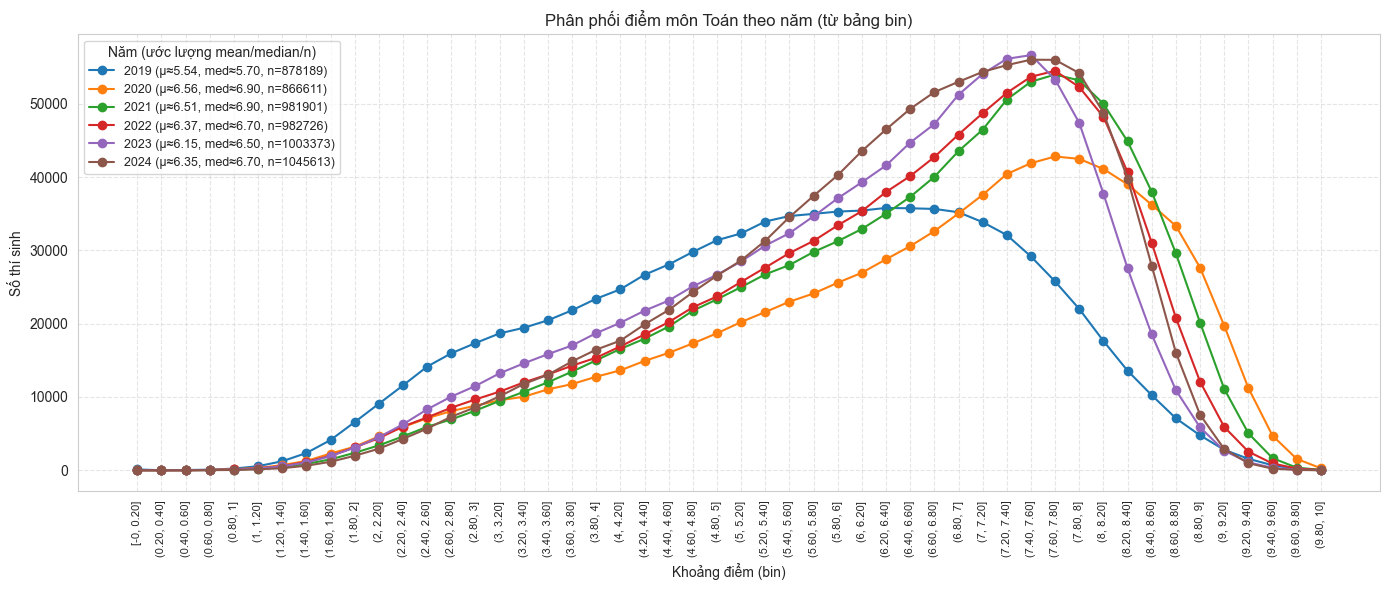

Vẽ môn: Văn


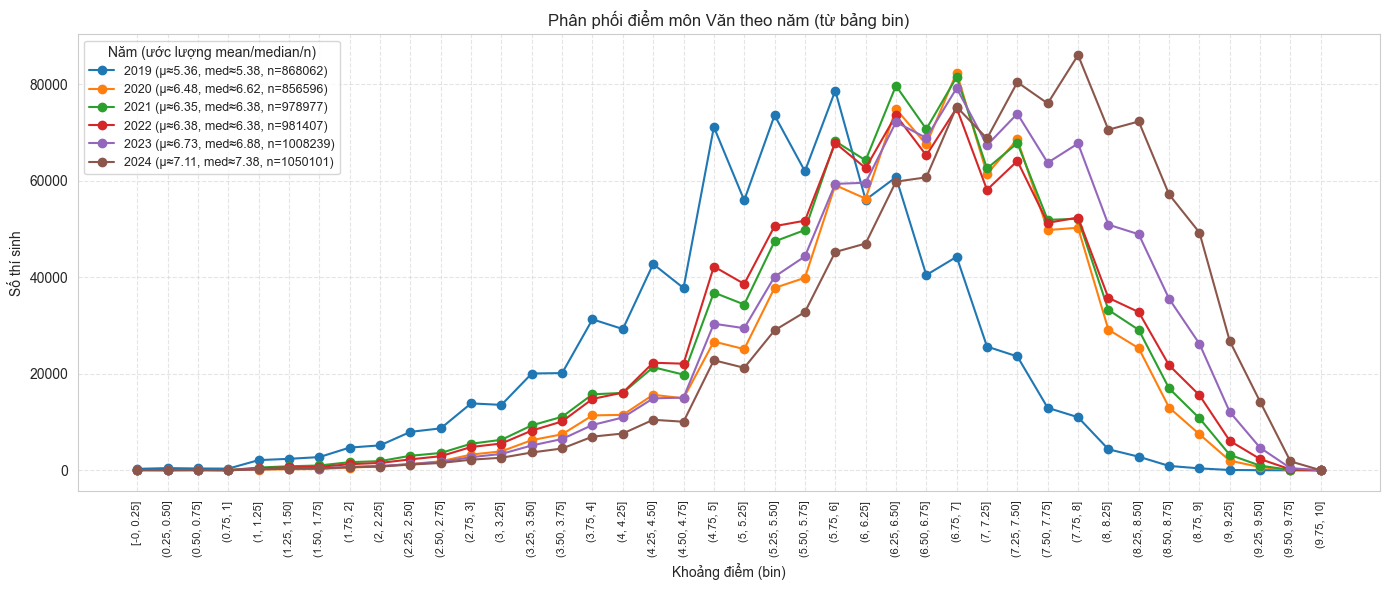

Vẽ môn: Ngoại ngữ


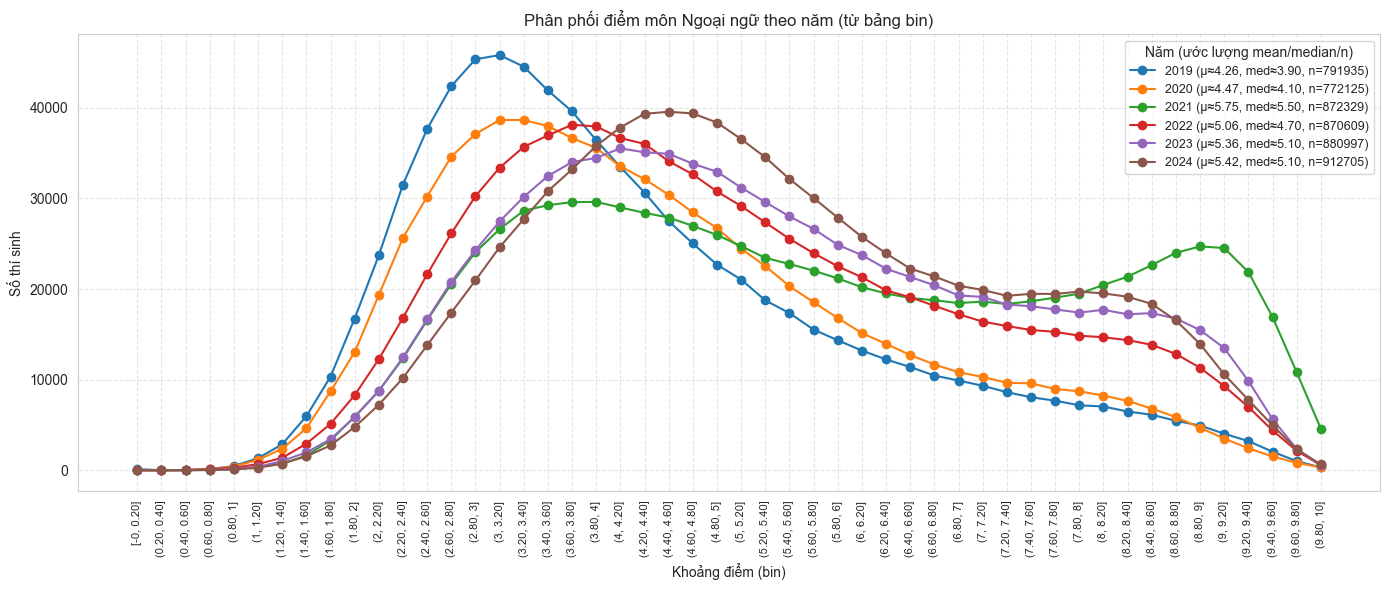

Vẽ môn: Lí


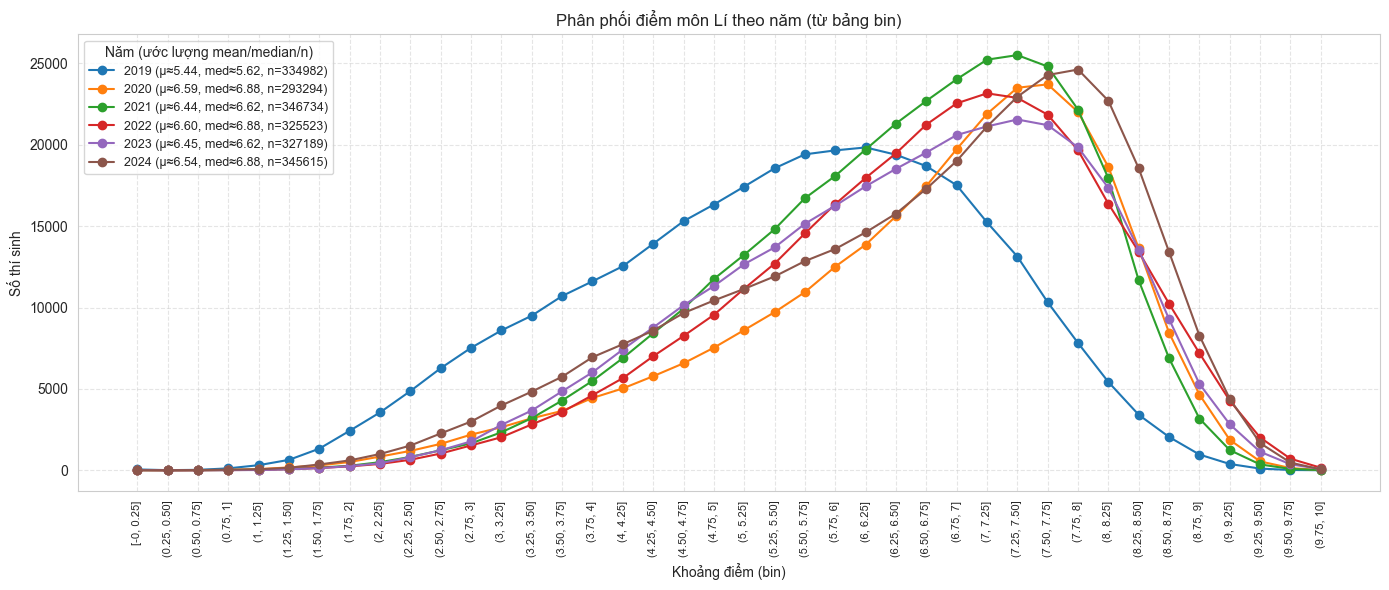

Vẽ môn: Hóa


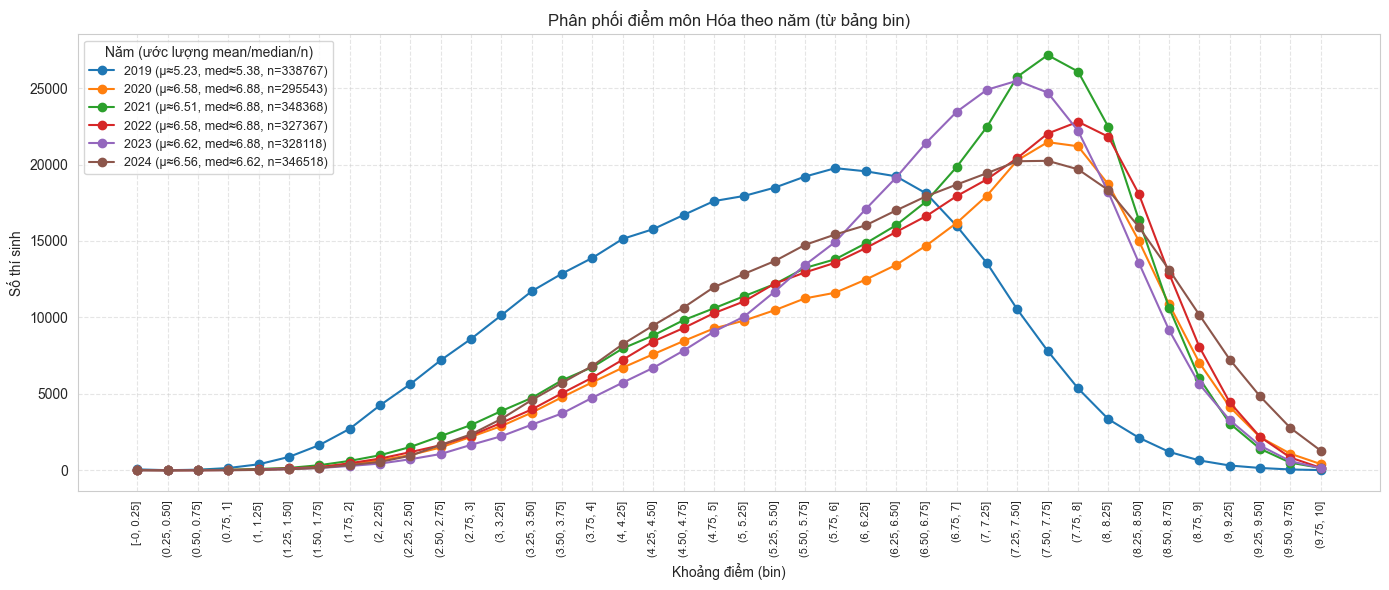

Vẽ môn: Sinh


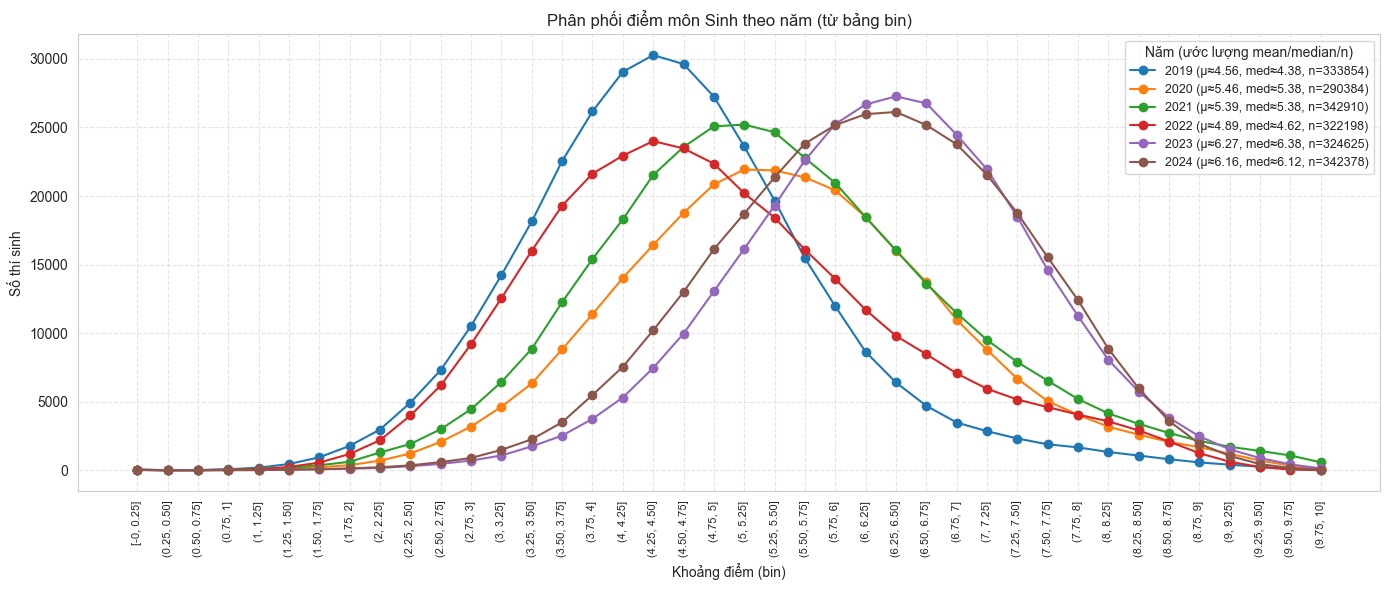

Vẽ môn: Sử


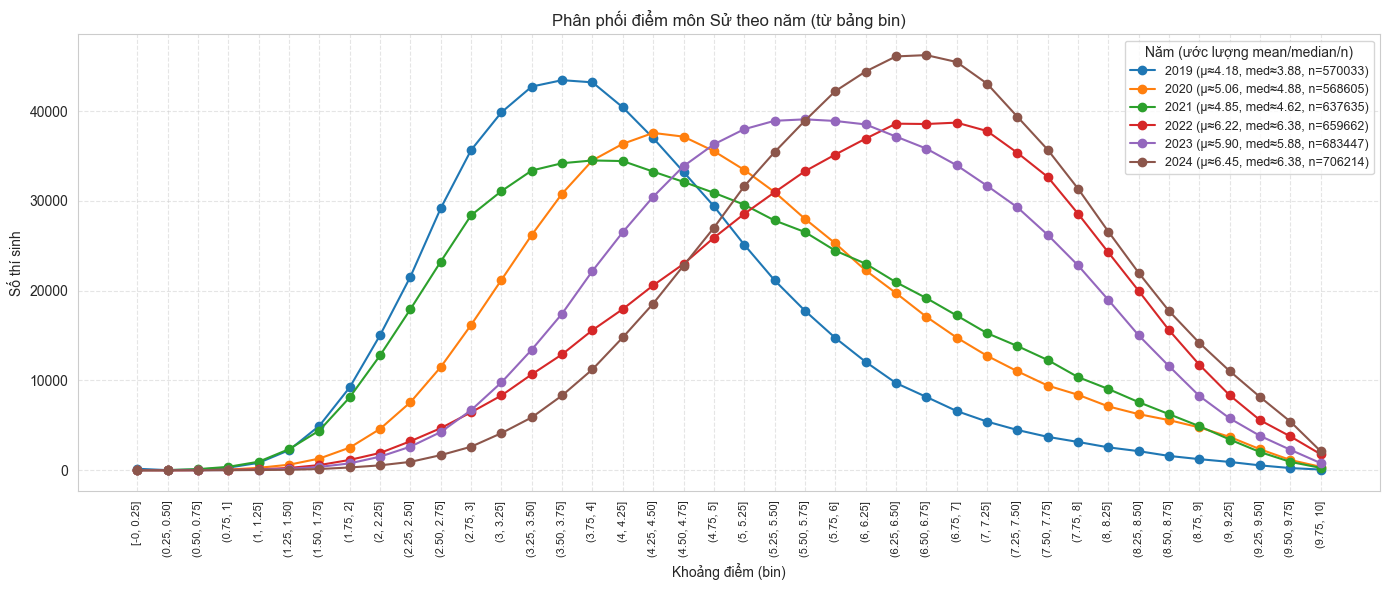

Vẽ môn: Địa


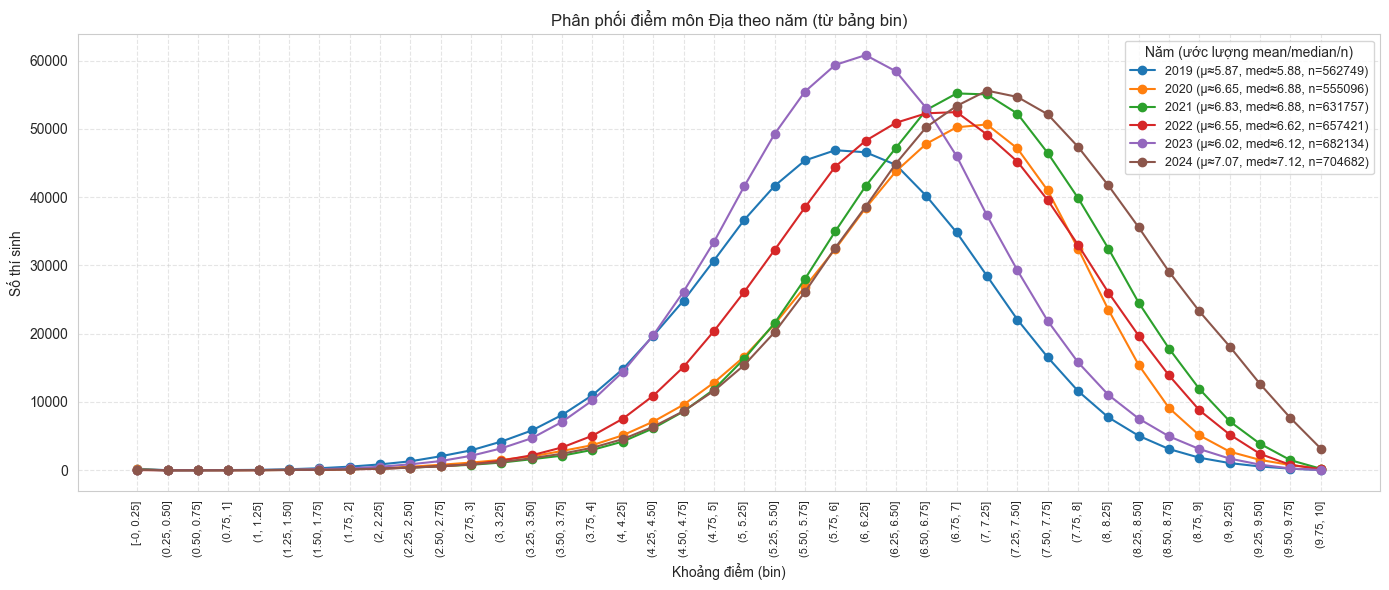

Vẽ môn: GDCD


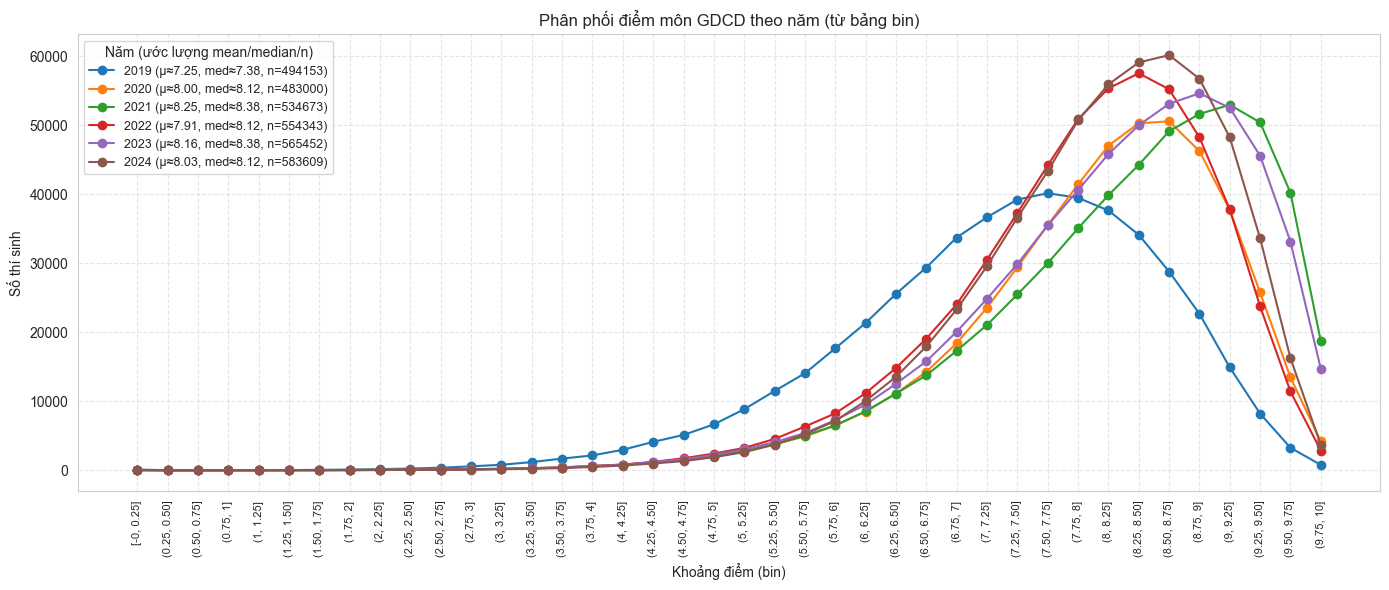

In [16]:
plot_all_subjects_from_binned(binned)

# **DATA ANALYTICS / BUSINESS INSIGHT**

## INSIGHT 1: Chênh lệch điểm thi THPT giữa các vùng
### Giả thuyết H0: Không có sự khác biệt về điểm TB giữa Thành phố lớn và Vùng sâu vùng xa
### Giả thuyết H1: Điểm TB Thành phố lớn > Vùng sâu vùng xa

In [4]:
# 1. LOAD DỮ LIỆU ĐIỂM THI
thanh_pho_lon = ['Hà Nội', 'TP.HCM', 'Hải Phòng', 'Đà Nẵng', 'Cần Thơ']
vung_sau_xa = ['Điện Biên', 'Lai Châu', 'Sơn La', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn']

data_all = []
for year in range(2019, 2025):
    try:
        df = pd.read_csv(f'../data/diem_tb_mon_{year}.csv', encoding='utf-8')
        df['year'] = year
        df = df.rename(columns={
            'Tỉnh/Thành phố': 'Tinh',
            'Điểm TB Toán': 'Toan',
            'Điểm TB Văn': 'Van', 
            'Điểm TB Ngoại ngữ': 'Ngoai_ngu'
        })
        data_all.append(df)
    except Exception as e:
        print(f"Lỗi load file năm {year}: {e}")

df_thi = pd.concat(data_all, ignore_index=True)
df_thi['avg_score'] = df_thi[['Toan', 'Van', 'Ngoai_ngu']].mean(axis=1)

df_thanh_pho = df_thi[df_thi['Tinh'].isin(thanh_pho_lon)]
df_vung_sau = df_thi[df_thi['Tinh'].isin(vung_sau_xa)]

print(f"Điểm TB thành phố lớn: {df_thanh_pho['avg_score'].mean():.2f}")
print(f"Điểm TB vùng sâu vùng xa: {df_vung_sau['avg_score'].mean():.2f}")
print(f"Chênh lệch: {df_thanh_pho['avg_score'].mean() - df_vung_sau['avg_score'].mean():.2f} điểm")

Điểm TB thành phố lớn: 6.35
Điểm TB vùng sâu vùng xa: 4.95
Chênh lệch: 1.40 điểm


In [7]:
# KIỂM ĐỊNH T-TEST (Insight 1)
t_stat, p_value = stats.ttest_ind(df_thanh_pho['avg_score'], df_vung_sau['avg_score'])

print("="*60)
print("KẾT QUẢ KIỂM ĐỊNH T-TEST (INSIGHT 1)")
print("="*60)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6e}")
if p_value < 0.05:
    print("✓ BÁC BỎ H0: Sự chênh lệch là có ý nghĩa thống kê")
else:
    print("✗ CHẤP NHẬN H0: Không có sự khác biệt")
print("="*60)

KẾT QUẢ KIỂM ĐỊNH T-TEST (INSIGHT 1)
T-statistic: 11.4548
P-value: 4.798396e-17
✓ BÁC BỎ H0: Sự chênh lệch là có ý nghĩa thống kê


/tmp/ipykernel_58368/457084986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_plot_1, x='Khu_vuc', y='Diem_TB', palette='Set2')


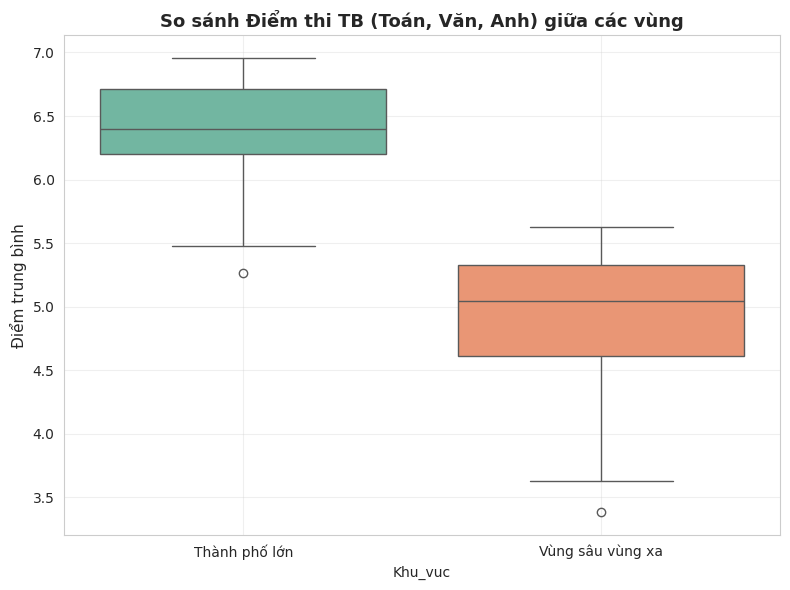

In [26]:
# VISUALIZATION 1
plt.figure(figsize=(8, 6))
data_plot_1 = pd.DataFrame({
    'Diem_TB': list(df_thanh_pho['avg_score']) + list(df_vung_sau['avg_score']),
    'Khu_vuc': ['Thành phố lớn']*len(df_thanh_pho) + ['Vùng sâu vùng xa']*len(df_vung_sau)
})
sns.boxplot(data=data_plot_1, x='Khu_vuc', y='Diem_TB', palette='Set2')
plt.title('So sánh Điểm thi TB (Toán, Văn, Anh) giữa các vùng', fontsize=13, fontweight='bold')
plt.ylabel('Điểm trung bình', fontsize=11)
plt.grid(True, alpha=0.3)## Phân tích độ ổn định điểm chuẩn giữa các tổ hợp môn
plt.tight_layout()
plt.savefig('../charts/insight1_region_gap.png', dpi=300)
plt.show()

## INSIGHT 2: "Lạm phát" Điểm chuẩn - Áp lực đầu vào ngày càng tăng
### Phân tích xu hướng tăng điểm chuẩn qua các năm (2019-2024)
### H0: Điểm chuẩn không có xu hướng tăng theo thời gian (Hệ số tương quan <= 0)
### H1: Điểm chuẩn có xu hướng tăng theo thời gian (Hệ số tương quan > 0)

In [27]:
# 2. LOAD & XỬ LÝ DỮ LIỆU ĐIỂM CHUẨN
df_chuan = pd.read_csv('../diem_chuan_chuan_hoa.csv')

# Chuyển đổi và làm sạch dữ liệu
df_chuan['Điểm chuẩn'] = pd.to_numeric(df_chuan['Điểm chuẩn'], errors='coerce')
df_chuan = df_chuan.dropna(subset=['Điểm chuẩn', 'Năm xét tuyển'])
df_chuan = df_chuan[(df_chuan['Điểm chuẩn'] >= 13) & (df_chuan['Điểm chuẩn'] <= 30)] # Lọc thang điểm 30

# --- LỌC DỮ LIỆU CHỈ LẤY ĐẾN NĂM 2024 ---
df_chuan = df_chuan[df_chuan['Năm xét tuyển'] <= 2024]

# Tính điểm trung bình theo từng năm
yearly_stats = df_chuan.groupby('Năm xét tuyển')['Điểm chuẩn'].agg(['mean', 'median', 'std']).reset_index()
print("Thống kê điểm chuẩn theo năm (2019-2024):")
print(yearly_stats)

Thống kê điểm chuẩn theo năm (2019-2024):
   Năm xét tuyển       mean  median       std
0           2019  17.769819    17.5  3.651154
1           2020  19.161855    18.5  4.207678
2           2021  20.543089    20.0  4.494163
3           2022  20.426614    20.5  4.371133
4           2023  20.428351    21.0  4.207447
5           2024  21.204892    22.0  4.499073


In [28]:
# KIỂM ĐỊNH XU HƯỚNG BẰNG HỒI QUY TUYẾN TÍNH (LINEAR REGRESSION)
# Chúng ta kiểm định xem biến 'Năm' có ảnh hưởng tích cực đến 'Điểm chuẩn' không
slope, intercept, r_value, p_value_lr, std_err = stats.linregress(df_chuan['Năm xét tuyển'], df_chuan['Điểm chuẩn'])

print("="*60)
print("KẾT QUẢ KIỂM ĐỊNH HỒI QUY (INSIGHT 2)")
print("="*60)
print(f"Hệ số góc (Slope): {slope:.4f} (Điểm chuẩn tăng trung bình {slope:.2f} điểm/năm)")
print(f"Hệ số tương quan (R-value): {r_value:.4f}")
print(f"P-value: {p_value_lr:.6e}")

print(f"\nKết luận (α = 0.05):")
if p_value_lr < 0.05 and slope > 0:
    print("✓ BÁC BỎ H0: Có xu hướng TĂNG điểm chuẩn rõ rệt theo thời gian")
    print("  -> Hiện tượng 'Lạm phát điểm chuẩn' là CÓ THỰC và có ý nghĩa thống kê")
else:
    print("✗ CHẤP NHẬN H0: Không có xu hướng tăng rõ rệt")
print("="*60)

KẾT QUẢ KIỂM ĐỊNH HỒI QUY (INSIGHT 2)
Hệ số góc (Slope): 0.5955 (Điểm chuẩn tăng trung bình 0.60 điểm/năm)
Hệ số tương quan (R-value): 0.2313
P-value: 9.106992e-176

Kết luận (α = 0.05):
✓ BÁC BỎ H0: Có xu hướng TĂNG điểm chuẩn rõ rệt theo thời gian
  -> Hiện tượng 'Lạm phát điểm chuẩn' là CÓ THỰC và có ý nghĩa thống kê


/tmp/ipykernel_58368/2588053254.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Năm xét tuyển', y='Điểm chuẩn', data=df_chuan, ax=axes[1], palette='viridis')


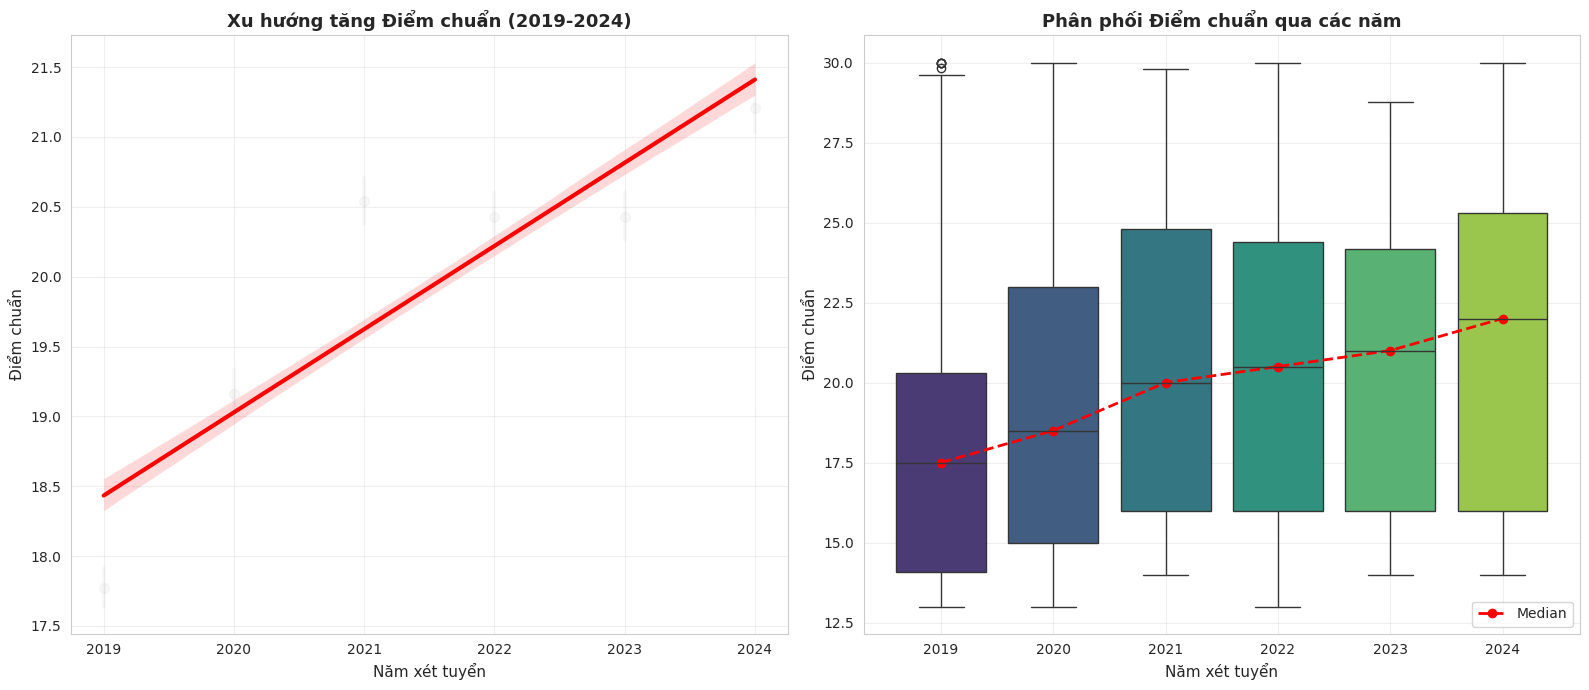

In [29]:

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Chart 1: Line plot với Hồi quy tuyến tính (thể hiện xu hướng)
sns.regplot(x='Năm xét tuyển', y='Điểm chuẩn', data=df_chuan, ax=axes[0],
            scatter_kws={'alpha': 0.05, 'color': 'gray'}, # Scatter mờ để hiện background
            line_kws={'color': 'red', 'linewidth': 3}, # Đường hồi quy nổi bật
            x_estimator=np.mean # Hiển thị điểm trung bình của từng năm
           )
axes[0].set_title('Xu hướng tăng Điểm chuẩn (2019-2024)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Điểm chuẩn', fontsize=11)
axes[0].set_xlabel('Năm xét tuyển', fontsize=11)
axes[0].set_xticks(yearly_stats['Năm xét tuyển'])
axes[0].grid(True, alpha=0.3)

# Chart 2: Boxplot chi tiết theo năm (thể hiện sự "trượt" của phổ điểm)
sns.boxplot(x='Năm xét tuyển', y='Điểm chuẩn', data=df_chuan, ax=axes[1], palette='viridis')
axes[1].set_title('Phân phối Điểm chuẩn qua các năm', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Điểm chuẩn', fontsize=11)
axes[1].set_xlabel('Năm xét tuyển', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Thêm đường nối Median để thấy rõ sự dịch chuyển
axes[1].plot(range(len(yearly_stats)), yearly_stats['median'], color='red', marker='o', linestyle='--', linewidth=2, label='Median')
axes[1].legend()

plt.tight_layout()
plt.savefig('../charts/insight2_score_inflation.png', dpi=300)
plt.show()

In [30]:
print("\n" + "="*80)
print("TỔNG HỢP KẾT QUẢ PHÂN TÍCH")
print("="*80)
print(f"\n1. CHÊNH LỆCH VÙNG MIỀN: Thành phố > Vùng xa khoảng {df_thanh_pho['avg_score'].mean() - df_vung_sau['avg_score'].mean():.2f} điểm.")
print("   -> Cần chính sách ưu tiên giáo dục cho vùng sâu vùng xa.")

print(f"\n2. LẠM PHÁT ĐIỂM CHUẨN: Điểm chuẩn tăng trung bình {slope:.2f} điểm MỖI NĂM.")
print(f"   -> Năm 2019 TB: {yearly_stats.iloc[0]['mean']:.2f} -> Năm 2024: {yearly_stats.iloc[-1]['mean']:.2f}")
print("   -> Áp lực cạnh tranh vào đại học ngày càng khốc liệt.")
print("="*80)


TỔNG HỢP KẾT QUẢ PHÂN TÍCH

1. CHÊNH LỆCH VÙNG MIỀN: Thành phố > Vùng xa khoảng 1.40 điểm.
   -> Cần chính sách ưu tiên giáo dục cho vùng sâu vùng xa.

2. LẠM PHÁT ĐIỂM CHUẨN: Điểm chuẩn tăng trung bình 0.60 điểm MỖI NĂM.
   -> Năm 2019 TB: 17.77 -> Năm 2024: 21.20
   -> Áp lực cạnh tranh vào đại học ngày càng khốc liệt.


## NSIGHT 3:Phân tích độ ổn định điểm chuẩn giữa các tổ hợp môn

**1. Câu hỏi:**
> *"Độ ổn định (mức độ biến động) của điểm chuẩn đầu vào có sự khác biệt giữa các tổ hợp môn xét tuyển (A00, A01, B00, D01,...) hay không? Tổ hợp nào có điểm chuẩn ổn định nhất và tổ hợp nào rủi ro nhất?"*

**2. Giả thuyết kiểm định:**
Sử dụng kiểm định **Levene** (do dữ liệu điểm chuẩn thường không tuân theo phân phối chuẩn hoàn toàn) để so sánh phương sai giữa các nhóm.

* $H_0$: Phương sai điểm chuẩn giữa các tổ hợp là **bằng nhau** (Độ ổn định như nhau).
* $H_1$: Có ít nhất một tổ hợp có phương sai **khác biệt** (Độ ổn định khác nhau).

**3. Mức ý nghĩa:** $\alpha = 0.05$

**4. Kỳ vọng:**
Dựa trên quan sát biểu đồ trực quan hóa, kỳ vọng dữ liệu sẽ chỉ ra:
* **A00 (Toán, Lý, Hóa):** Có xu hướng ổn định nhất (Phương sai thấp).
* **D01 (Toán, Văn, Anh):** Có xu hướng biến động mạnh nhất (Phương sai cao).

In [15]:
# Chuẩn bị dữ liệu
# Đọc dữ liệu điểm chuẩn
df_benchmark = pd.read_csv('../data/diem_chuan_all.csv') 

# Lọc các khối mục tiêu
target_blocks = ['A00', 'A01', 'B00', 'C00', 'D01']
df_filtered = df_benchmark[df_benchmark['Tổ hợp môn'].isin(target_blocks)]

# Tính độ lệch chuẩn cho từng ngành
instability_df = df_filtered.groupby(['Mã trường', 'Mã ngành', 'Tổ hợp môn'])['Điểm chuẩn'].agg(['std', 'count']).reset_index()
instability_df = instability_df[instability_df['count'] >= 5] 

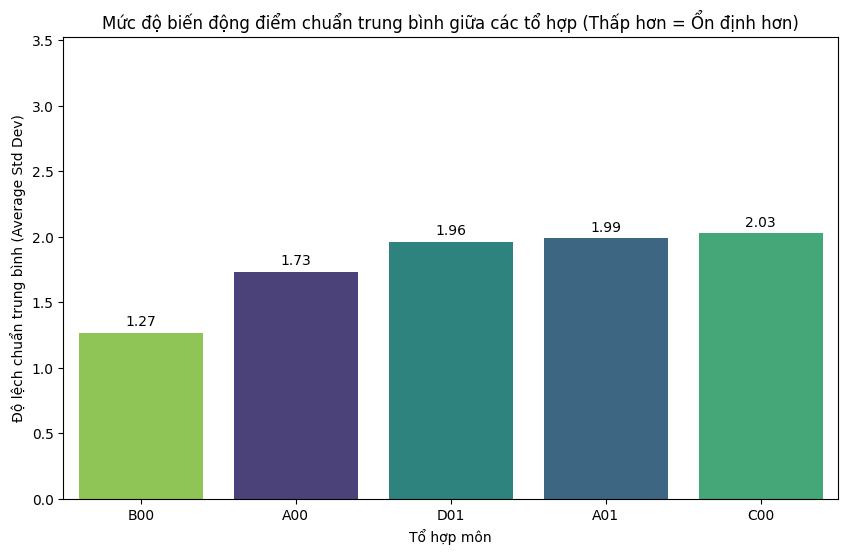

In [16]:
# Trực quan hóa
avg_instability = instability_df.groupby('Tổ hợp môn')['std'].mean().reset_index()
avg_instability = avg_instability.sort_values('std') # Sắp xếp từ thấp đến cao (Ổn định -> Biến động)

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x='Tổ hợp môn', 
    y='std', 
    data=instability_df, 
    order=avg_instability['Tổ hợp môn'], 
    palette="viridis", 
    estimator='mean',
    errorbar=None, 
    hue='Tổ hợp môn', 
    legend=False
)

# Thêm nhãn giá trị lên đầu mỗi cột
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

plt.title('Mức độ biến động điểm chuẩn trung bình giữa các tổ hợp (Thấp hơn = Ổn định hơn)')
plt.ylabel('Độ lệch chuẩn trung bình (Average Std Dev)')
plt.xlabel('Tổ hợp môn')

plt.ylim(0, avg_instability['std'].max() + 1.5)
plt.show()


In [19]:
# Kiểm định Levene
# H0: Phương sai độ biến động giữa các nhóm là bằng nhau
arrays = [instability_df[instability_df['Tổ hợp môn'] == b]['std'].dropna() for b in target_blocks]
stat, p_value = stats.levene(*arrays)

# Tính toán các chỉ số trung bình để xếp hạng
std_means = instability_df.groupby('Tổ hợp môn')['std'].mean().sort_values()
most_stable = std_means.index[0]       # Khối có độ lệch chuẩn trung bình thấp nhất
least_stable = std_means.index[-1]     # Khối có độ lệch chuẩn trung bình cao nhất

print("\n" + "="*60)
print("BÁO CÁO PHÂN TÍCH ĐỘ ỔN ĐỊNH ĐIỂM CHUẨN (LEVENE'S TEST)")
print("="*60)

print(f"\n THÔNG SỐ KIỂM ĐỊNH:")
print(f"   - Giả thuyết H0: Phương sai (độ biến động) giữa các tổ hợp là NGANG NHAU.")
print(f"   - Giả thuyết H1: Có sự KHÁC BIỆT về độ biến động giữa các tổ hợp.")
print(f"   - Levene Statistic: {stat:.4f}")
print(f"   - P-value:          {p_value:.4e}")

print(f"\n KẾT LUẬN THỐNG KÊ:")
if p_value < 0.05:
    print("P-value < 0.05 => BÁC BỎ H0.")
    print("=> Kết luận: Có sự khác biệt có ý nghĩa thống kê về độ ổn định điểm chuẩn giữa các tổ hợp môn.")
    
    print(f"\n PHÂN TÍCH CHI TIẾT:")
    print(f"Dựa trên giá trị trung bình của độ lệch chuẩn (std):")
    
    # In bảng xếp hạng
    print(f"{'-'*40}")
    print(f"{'Tổ hợp':<10} | {'Độ biến động TB':<20} | {'Đánh giá'}")
    print(f"{'-'*40}")
    for to_hop, val in std_means.items():
        rating = "Ổn định nhất" if to_hop == most_stable else \
                 "Biến động nhất" if to_hop == least_stable else "Trung bình"
        print(f"   {to_hop:<10} | {val:.4f}               | {rating}")
    print(f"{'-'*40}")
    
    print(f"\n NHẬN ĐỊNH")
    print(f"- Tổ hợp **{most_stable}** có điểm chuẩn ổn định nhất qua các năm. Thí sinh đăng ký khối này có thể dự đoán điểm chuẩn sát thực tế hơn.")
    print(f"- Tổ hợp **{least_stable}** có mức độ biến động điểm chuẩn cao nhất. Thí sinh xét tuyển khối này cần chuẩn bị phương án dự phòng (biên độ điểm an toàn lớn hơn) để tránh rủi ro trượt do điểm chuẩn tăng đột biến.")

else:
    print("P-value >= 0.05 => KHÔNG ĐỦ BẰNG CHỨNG bác bỏ H0.")
    print("=> Kết luận: Độ biến động điểm chuẩn giữa các khối A00, A01, D01... là tương đương nhau. Không có khối nào rủi ro hơn đáng kể.")

print("="*60)


BÁO CÁO PHÂN TÍCH ĐỘ ỔN ĐỊNH ĐIỂM CHUẨN (LEVENE'S TEST)

 THÔNG SỐ KIỂM ĐỊNH:
   - Giả thuyết H0: Phương sai (độ biến động) giữa các tổ hợp là NGANG NHAU.
   - Giả thuyết H1: Có sự KHÁC BIỆT về độ biến động giữa các tổ hợp.
   - Levene Statistic: 5.7810
   - P-value:          1.6995e-04

 KẾT LUẬN THỐNG KÊ:
P-value < 0.05 => BÁC BỎ H0.
=> Kết luận: Có sự khác biệt có ý nghĩa thống kê về độ ổn định điểm chuẩn giữa các tổ hợp môn.

 PHÂN TÍCH CHI TIẾT:
Dựa trên giá trị trung bình của độ lệch chuẩn (std):
----------------------------------------
Tổ hợp     | Độ biến động TB      | Đánh giá
----------------------------------------
   B00        | 1.2660               | Ổn định nhất
   A00        | 1.7310               | Trung bình
   D01        | 1.9615               | Trung bình
   A01        | 1.9892               | Trung bình
   C00        | 2.0257               | Biến động nhất
----------------------------------------

 NHẬN ĐỊNH
- Tổ hợp **B00** có điểm chuẩn ổn định nhất qua các năm

## NSIGHT 4: Phân tích tác động của phổ điểm môn Văn đến điểm chuẩn khối C00

**1. Câu hỏi:**
> *"Sự biến động của phổ điểm môn Ngữ Văn qua các năm có phải là nguyên nhân chính dẫn đến sự trồi sụt (thiếu ổn định) của điểm chuẩn khối C00 hay không? Có mối tương quan nào giữa điểm trung bình môn Văn và điểm chuẩn C00?"*

**2. Giả thuyết kiểm định:**

* **Kiểm định 1: Sự biến động của đề thi (ANOVA / Levene)**
    * $H_0$: Điểm trung bình và độ phân tán của môn Văn **không đổi** qua các năm (Đề thi ổn định).
    * $H_1$: Có sự khác biệt đáng kể về điểm số giữa các năm (Đề thi có năm dễ, năm khó).

* **Kiểm định 2: Mối liên hệ với điểm chuẩn (Pearson Correlation)**
    * $H_0$: Không có tương quan tuyến tính giữa Điểm Văn trung bình và Điểm chuẩn C00 ($r = 0$).
    * $H_1$: Có sự tương quan tuyến tính ($r \neq 0$). Nếu $r$ dương và cao ($> 0.8$), điểm Văn tăng thì điểm chuẩn C00 cũng bị "đẩy" lên theo.

**3. Kỳ vọng:**
Khối C00 (Văn, Sử, Địa) phụ thuộc nhiều vào môn Văn (môn tự luận duy nhất). Kỳ vọng dữ liệu sẽ chỉ ra mối **tương quan thuận rất mạnh**: Năm nào đề Văn "dễ thở" (điểm cao), năm đó điểm chuẩn C00 sẽ lạm phát mạnh.
**4. Lưu ý:**
Lý do lựa chọn biến **"Điểm chuẩn trung bình" (Benchmark)** thay vì "Điểm thi trung bình" của thí sinh:
* **Tránh thiên kiến hiển nhiên:** Môn Văn là thành phần cấu tạo nên tổng điểm C00 ($Total = Văn + Sử + Địa$). Do đó, điểm Văn tăng thì hiển nhiên tổng điểm thi của thí sinh sẽ tăng. Việc chứng minh tương quan này không mang lại giá trị phân tích.
* **Đo lường rủi ro thực tế:** Mục tiêu bài toán là đánh giá độ khó khi xét tuyển. Chúng ta cần xác định xem liệu đề thi dễ có dẫn đến việc các trường Đại học nâng mức điểm sàn hay không (*Lạm phát điểm chuẩn*). Đây mới là yếu tố rủi ro thực sự đối với thí sinh.

In [20]:
# Chuẩn bị dữ liệu
# Tính trung bình điểm Văn theo năm
years = range(2019, 2025)
liter_stats = []

for year in years:
    try:
        file_path = f'../data/diem_thi_{year}_new.csv'
        df_score = pd.read_csv(file_path, low_memory=False) 
        
        # Tính trung bình môn Văn
        if 'Văn' in df_score.columns:
            mean_val = df_score['Văn'].mean()
        elif 'Ngữ văn' in df_score.columns: # Phòng trường hợp tên cột khác
             mean_val = df_score['Ngữ văn'].mean()
        else:
             mean_val = df_score.iloc[:, 6].mean() # Lấy theo vị trí nếu cần (ví dụ cột thứ 6)

        liter_stats.append({'Nam': year, 'Diem_Van_TB': mean_val})
    except FileNotFoundError:
        print(f"Không tìm thấy file năm {year}")

df_liter = pd.DataFrame(liter_stats)

# Tính trung bình điểm chuẩn C00 theo năm
df_c00 = df_benchmark[df_benchmark['Tổ hợp môn'] == 'C00']
c00_stats = df_c00.groupby('Năm xét tuyển')['Điểm chuẩn'].mean().reset_index()
c00_stats.rename(columns={'Năm xét tuyển': 'Nam', 'Điểm chuẩn': 'Diem_Chuan_C00_TB'}, inplace=True)

# Hợp nhất
merged_df = pd.merge(df_liter, c00_stats, on='Nam')

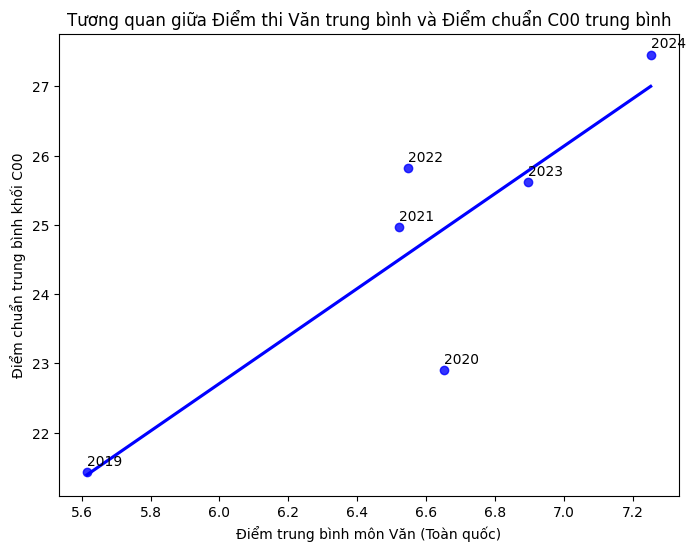

In [21]:
# Trực quan hóa bằng biểu đồ
plt.figure(figsize=(8, 6))
sns.regplot(x='Diem_Van_TB', y='Diem_Chuan_C00_TB', data=merged_df, ci=None, color='b')

for i in range(len(merged_df)):
    plt.annotate(merged_df['Nam'][i], 
                 (merged_df['Diem_Van_TB'][i], merged_df['Diem_Chuan_C00_TB'][i] + 0.1))

plt.title('Tương quan giữa Điểm thi Văn trung bình và Điểm chuẩn C00 trung bình')
plt.xlabel('Điểm trung bình môn Văn (Toàn quốc)')
plt.ylabel('Điểm chuẩn trung bình khối C00')
plt.show()

In [22]:
# Kiểm định
# Tính hệ số tương quan Pearson
corr, p_val = stats.pearsonr(merged_df['Diem_Van_TB'], merged_df['Diem_Chuan_C00_TB'])


print("\n" + "="*60)
print(" BÁO CÁO TÁC ĐỘNG CỦA ĐIỂM VĂN ĐẾN ĐIỂM CHUẨN C00")
print("="*60)

print(f"\n DỮ LIỆU THỐNG KÊ QUA CÁC NĂM:")
print(f"   {'-'*45}")
print(f"   {'Năm':<6} | {'TB Môn Văn':<12} | {'TB Điểm Chuẩn C00':<15}")
print(f"   {'-'*45}")

for index, row in merged_df.iterrows():
    print(f"   {int(row['Nam']):<6} | {row['Diem_Van_TB']:<12.2f} | {row['Diem_Chuan_C00_TB']:<15.2f}")

print(f"   {'-'*45}")

print(f"\n2. KẾT QUẢ KIỂM ĐỊNH TƯƠNG QUAN (PEARSON):")
print(f"   - Hệ số tương quan (r): {corr:.4f}")
print(f"   - P-value:              {p_val:.4e}")

print(f"\n PHÂN TÍCH")

if p_val < 0.05:
    correlation_strength = ""
    if abs(corr) > 0.8: correlation_strength = "RẤT MẠNH"
    elif abs(corr) > 0.5: correlation_strength = "KHÁ MẠNH"
    else: correlation_strength = "TRUNG BÌNH"
    
    direction = "THUẬN" if corr > 0 else "NGHỊCH"
    
    print(f"BÁC BỎ H0 (P-value < 0.05).")
    print(f"=> Có mối tương quan {direction} {correlation_strength} giữa độ khó đề Văn và điểm chuẩn C00.")
    
    print(f"\nKẾT LUẬN CHI TIẾT:")
    print(f"- Dữ liệu cho thấy hệ số r = {corr:.2f}. Điều này xác nhận rằng biến động điểm chuẩn C00")
    print(f"bị ảnh hưởng lớn bởi phổ điểm môn Văn.")
    if corr > 0:
        print(f"- Cụ thể: Năm nào điểm trung bình Văn tăng, điểm chuẩn C00 cũng có xu hướng tăng theo.")
else:
    print(f"CHƯA ĐỦ BẰNG CHỨNG để khẳng định mối liên hệ rõ ràng.")

print("="*60)


 BÁO CÁO TÁC ĐỘNG CỦA ĐIỂM VĂN ĐẾN ĐIỂM CHUẨN C00

 DỮ LIỆU THỐNG KÊ QUA CÁC NĂM:
   ---------------------------------------------
   Năm    | TB Môn Văn   | TB Điểm Chuẩn C00
   ---------------------------------------------
   2019   | 5.62         | 21.43          
   2020   | 6.65         | 22.90          
   2021   | 6.52         | 24.97          
   2022   | 6.55         | 25.82          
   2023   | 6.90         | 25.61          
   2024   | 7.25         | 27.46          
   ---------------------------------------------

2. KẾT QUẢ KIỂM ĐỊNH TƯƠNG QUAN (PEARSON):
   - Hệ số tương quan (r): 0.8600
   - P-value:              2.8030e-02

 PHÂN TÍCH
BÁC BỎ H0 (P-value < 0.05).
=> Có mối tương quan THUẬN RẤT MẠNH giữa độ khó đề Văn và điểm chuẩn C00.

KẾT LUẬN CHI TIẾT:
- Dữ liệu cho thấy hệ số r = 0.86. Điều này xác nhận rằng biến động điểm chuẩn C00
bị ảnh hưởng lớn bởi phổ điểm môn Văn.
- Cụ thể: Năm nào điểm trung bình Văn tăng, điểm chuẩn C00 cũng có xu hướng tăng theo.


## NSIGHT 5: Phân tích khả năng phân loại thí sinh: Tự nhiên vs Xã hội
**1. Câu hỏi:**
> *"Các môn Khoa học Tự nhiên (Toán, Lý, Hóa, Sinh) có khả năng phân loại thí sinh tốt hơn (độ phân tán điểm rộng hơn) so với các môn Khoa học Xã hội (Văn, Sử, Địa, GDCD) hay không?"*

**2. Giả thuyết kiểm định:**

* **Kiểm định: So sánh độ phân tán (Variance Comparison)**
    * Sử dụng **Phương sai (Variance)** làm thước đo cho khả năng phân loại.
    * $H_0$: Phương sai trung bình của nhóm Tự nhiên và nhóm Xã hội là **bằng nhau** (Khả năng phân loại tương đương).
    * $H_1$: Nhóm Tự nhiên có phương sai **cao hơn** nhóm Xã hội (Độ phân hóa rõ rệt hơn, biểu đồ "bè" ra).

**3. Kỳ vọng:**
Kỳ vọng rằng các môn **Tự nhiên** sẽ có phương sai cao hơn do đặc thù tính toán đúng/sai rõ ràng (điểm trải rộng từ thấp đến cao). Ngược lại, các môn **Xã hội** (đặc biệt là GDCD hoặc Văn) thường có xu hướng điểm tập trung dày đặc ở ngưỡng an toàn (biểu đồ nhọn), dẫn đến khả năng phân loại thí sinh kém hơn.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- BƯỚC 1: TẢI VÀ CHUẨN BỊ DỮ LIỆU ---
try:
    # Thêm low_memory=False để tránh warning
    df_2024 = pd.read_csv('../data/diem_thi_2024_new.csv', low_memory=False)
except FileNotFoundError:
    print("Không tìm thấy file dữ liệu. Hãy kiểm tra lại đường dẫn.")

# Danh sách môn
natural_subs = ['Toán', 'Lí', 'Hóa', 'Sinh']
social_subs = ['Văn', 'Sử', 'Địa', 'GDCD']
all_subs = natural_subs + social_subs

# Kiểm tra xem các cột có tồn tại trong file không
available_cols = [col for col in all_subs if col in df_2024.columns]
if len(available_cols) < len(all_subs):
    print("Cảnh báo: Một số tên cột không khớp với dữ liệu. Đang dùng các cột tìm thấy:", available_cols)


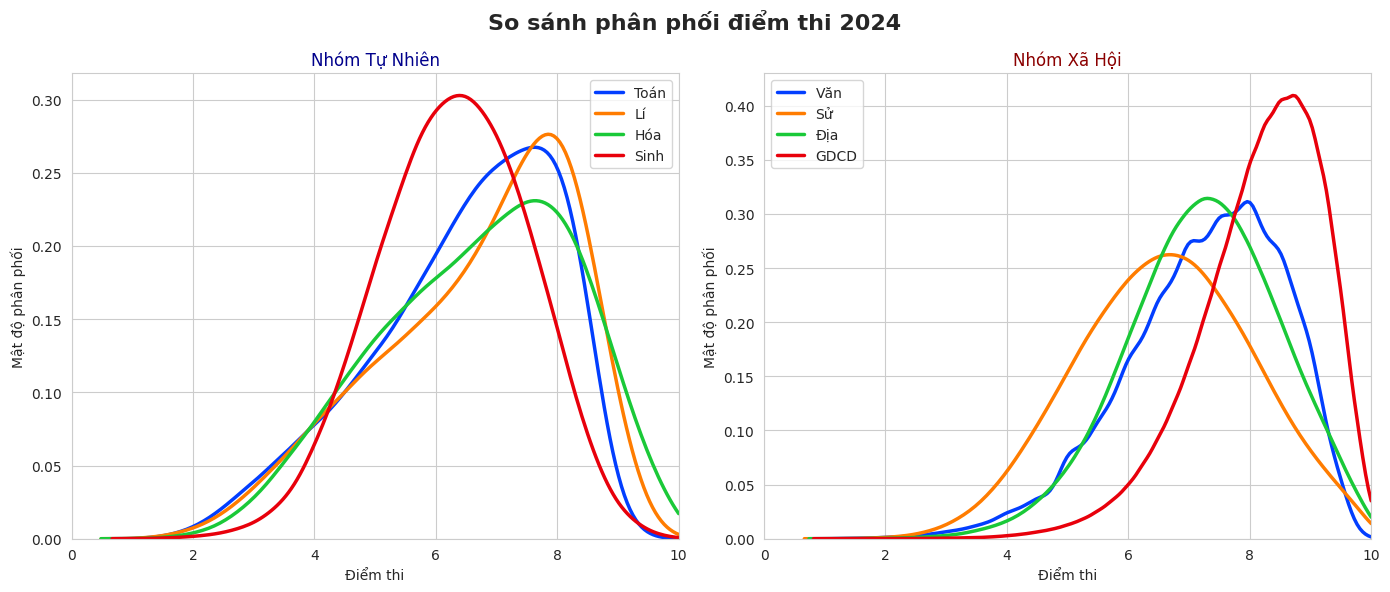

In [24]:
# Trực quan hóa + vẽ biểu đồ
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))
plt.suptitle('So sánh phân phối điểm thi 2024', fontsize=16, fontweight='bold')

# Nhóm tự nhiên
plt.subplot(1, 2, 1)
palette_nat = sns.color_palette("bright", len(natural_subs))

for i, col in enumerate(natural_subs):
    if col in df_2024.columns:
        sns.kdeplot(
            data=df_2024, x=col, 
            label=col, 
            fill=False,      
            linewidth=2.5,  
            bw_adjust=2,     
            clip=(0, 10),     
            color=palette_nat[i]
        )
plt.title('Nhóm Tự Nhiên', color='darkblue', fontsize=12)
plt.xlabel('Điểm thi')
plt.ylabel('Mật độ phân phối')
plt.xlim(0, 10)
plt.legend()

# Nhóm xã hội
plt.subplot(1, 2, 2)
palette_soc = sns.color_palette("bright", len(social_subs))

for i, col in enumerate(social_subs):
    if col in df_2024.columns:
        sns.kdeplot(
            data=df_2024, x=col, 
            label=col, 
            fill=False,     
            linewidth=2.5,    
            bw_adjust=2,     
            clip=(0, 10),     
            color=palette_soc[i]
        )
plt.title('Nhóm Xã Hội', color='darkred', fontsize=12)
plt.xlabel('Điểm thi')
plt.ylabel('Mật độ phân phối')
plt.xlim(0, 10)
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Kiểm định
# Tính phương sai cho từng môn
variances = df_2024[available_cols].var().sort_values(ascending=False)

# Tính phương sai trung bình của từng nhóm để so sánh tổng quan
nat_vars = variances[variances.index.isin(natural_subs)]
soc_vars = variances[variances.index.isin(social_subs)]

mean_var_nat = nat_vars.mean()
mean_var_soc = soc_vars.mean()

print("\n" + "="*60)
print("BÁO CÁO SO SÁNH KHẢ NĂNG PHÂN LOẠI (TỰ NHIÊN VS XÃ HỘI)")
print("="*60)

print(f"\n BẢNG XẾP HẠNG PHƯƠNG SAI (Độ phân hóa):")
print(f"   (Phương sai càng cao -> Phân loại càng tốt)")
print(f"   {'-'*45}")
print(f"   {'Môn thi':<10} | {'Nhóm':<10} | {'Phương sai':<10}")
print(f"   {'-'*45}")

for subject in variances.index:
    group = "Tự nhiên" if subject in natural_subs else "Xã hội"
    print(f"   {subject:<10} | {group:<10} | {variances[subject]:<10.4f}")

print(f"{'-'*45}")
print(f"- TB Phương sai nhóm Tự nhiên: {mean_var_nat:.4f}")
print(f"- TB Phương sai nhóm Xã hội:  {mean_var_soc:.4f}")

print(f"\nPHÂN TÍCH & INSIGHT:")

# Logic biện luận tự động
diff = mean_var_nat - mean_var_soc
winner = "Tự nhiên" if diff > 0 else "Xã hội"
percent_diff = abs(diff) / mean_var_soc * 100

if diff > 0:
    print(f"NHÓM TỰ NHIÊN PHÂN LOẠI TỐT HƠN.")
    print(f"=> Trung bình phương sai nhóm Tự nhiên cao hơn nhóm Xã hội khoảng {percent_diff:.1f}%.")
    
    best_sub = variances.index[0]
    worst_sub = variances.index[-1]
    
    print(f"\nKẾT LUẬN CHI TIẾT:")
    print(f"- Môn **{best_sub}** có mức độ phân hóa thí sinh mạnh nhất (Phương sai cao nhất).")
    print(f"Đây là môn học đáng tin cậy để các trường ĐH TOP đầu dùng làm tiêu chí xét tuyển.")
    
    print(f"- Môn **{worst_sub}** có độ phân hóa thấp nhất (Dữ liệu thường tập trung cục bộ).")
    print(f"Việc xét tuyển dựa trên môn này cần cẩn trọng vì điểm số của thí sinh khá tương đồng nhau.")
else:
    print(f"NHÓM XÃ HỘI PHÂN LOẠI TỐT HƠN (HOẶC NGANG BẰNG).")
    print(f"=> Dữ liệu năm nay cho thấy sự bất ngờ khi nhóm Xã hội có độ phân tán rộng hơn.")

print("="*60)


BÁO CÁO SO SÁNH KHẢ NĂNG PHÂN LOẠI (TỰ NHIÊN VS XÃ HỘI)

 BẢNG XẾP HẠNG PHƯƠNG SAI (Độ phân hóa):
   (Phương sai càng cao -> Phân loại càng tốt)
   ---------------------------------------------
   Môn thi    | Nhóm       | Phương sai
   ---------------------------------------------
   Hóa        | Tự nhiên   | 2.6785    
   Lí         | Tự nhiên   | 2.6397    
   Toán       | Tự nhiên   | 2.3658    
   Sử         | Xã hội     | 2.0823    
   Văn        | Xã hội     | 1.6892    
   Địa        | Xã hội     | 1.5678    
   Sinh       | Tự nhiên   | 1.5409    
   GDCD       | Xã hội     | 1.0607    
---------------------------------------------
- TB Phương sai nhóm Tự nhiên: 2.3062
- TB Phương sai nhóm Xã hội:  1.6000

PHÂN TÍCH & INSIGHT:
NHÓM TỰ NHIÊN PHÂN LOẠI TỐT HƠN.
=> Trung bình phương sai nhóm Tự nhiên cao hơn nhóm Xã hội khoảng 44.1%.

KẾT LUẬN CHI TIẾT:
- Môn **Hóa** có mức độ phân hóa thí sinh mạnh nhất (Phương sai cao nhất).
Đây là môn học đáng tin cậy để các trường ĐH TOP đầu

## INSIGHT 6: PHÂN TÍCH TÁC ĐỘNG CỦA PHỔ ĐIỂM TOÁN ĐẾN ĐIỂM CHUẨN KHỐI A

### 1. Câu hỏi nghiên cứu (Research Question)
> **"Sự biến thiên của điểm trung bình môn Toán có mối tương quan tuyến tính như thế nào đối với điểm chuẩn trung bình của nhóm ngành xét tuyển khối A (A00, A01) trong giai đoạn 2019-2024, và mức độ đóng góp của biến số này vào sự thay đổi điểm chuẩn là bao nhiêu phần trăm?"**

### 2. Phương pháp kiểm định (Methodology)
Sử dụng phương pháp **Phân tích Hồi quy Tuyến tính Đơn (Simple Linear Regression)** kết hợp với **Hệ số tương quan Pearson** trên tập dữ liệu chuỗi thời gian (Time-series).

* **Biến độc lập ($X$):** Điểm trung bình môn Toán toàn quốc qua các năm (`Avg_Math_Score`).
* **Biến phụ thuộc ($Y$):** Điểm chuẩn trung bình của các tổ hợp khối A (`Avg_Benchmark`).
* **Công cụ thực hiện:**
    * Tính hệ số **$r$ (Pearson)** để đo độ chặt chẽ.
    * Tính hệ số **$R^2$ (R-squared)** để đo độ phù hợp của mô hình.
    * Kiểm định ý nghĩa thống kê bằng **P-value**.

### 3. Giả thuyết kiểm định (Hypotheses)

* **Giả thuyết không ($H_0$):**
    Không có mối tương quan có ý nghĩa thống kê giữa điểm Toán và điểm chuẩn khối A. Sự tăng/giảm của điểm Toán là ngẫu nhiên và không giải thích được sự biến động của điểm chuẩn.
    $$H_0: r = 0 \quad (\text{hoặc } \beta = 0)$$

* **Giả thuyết đối ($H_1$):**
    Tồn tại mối tương quan tuyến tính dương (thuận chiều) giữa điểm Toán và điểm chuẩn khối A. Khi phổ điểm Toán tăng, điểm chuẩn khối A sẽ tăng theo một tỷ lệ nhất định.
    $$H_1: r > 0 \quad (\text{và } P\text{-value} < 0.05)$$

### 4. Các chỉ số đánh giá từ Code (Evaluation Metrics)
Dựa vào đoạn code bạn đã viết, bạn sẽ cần biện luận các kết quả sau:

* **Hệ số tương quan Pearson ($r$):**
    * Nếu $r > 0.8$: Mối quan hệ rất mạnh (Điểm Toán gần như quyết định xu hướng).
    * Nếu $0.5 < r < 0.8$: Mối quan hệ khá mạnh.

* **Hệ số xác định ($R^2$):**
    * Chỉ số này trả lời cho vế sau của câu hỏi nghiên cứu: *"Bao nhiêu % biến động của điểm chuẩn đến từ điểm Toán?"*
    * *Ví dụ:* Nếu $R^2 = 0.65$, nghĩa là **65%** lý do điểm chuẩn tăng/giảm là do đề Toán khó/dễ, **35%** còn lại do các yếu tố khác (chỉ tiêu, điểm Lý/Hóa...).

* **Biểu đồ trực quan:**
    * **Biểu đồ 2 trục:** Dùng để khẳng định sự "đồng pha" (cùng nhịp tăng giảm).
    * **Biểu đồ Scatter:** Dùng để xác định độ phân tán và vùng tin cậy của dự báo.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Cấu hình giao diện biểu đồ
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Tắt cảnh báo không cần thiết
import warnings
warnings.filterwarnings('ignore')

print("✅ Đã import thư viện thành công!")

✅ Đã import thư viện thành công!


In [6]:
# Đọc file dữ liệu điểm chuẩn đã tiền xử lý
try:
    df_benchmark = pd.read_csv('../data/data_pretrain_filled.csv')
    print(f" Đã đọc file điểm chuẩn thành công!")
    print(f"   - Tổng số dòng: {df_benchmark.shape[0]}")
    print(f"   - Các cột dữ liệu: {list(df_benchmark.columns[:5])}...")
except FileNotFoundError:
    print(" Lỗi: Không tìm thấy file 'data_pretrain_filled.csv'. Vui lòng kiểm tra đường dẫn.")

 Đã đọc file điểm chuẩn thành công!
   - Tổng số dòng: 2602
   - Các cột dữ liệu: ['Mã trường', 'Mã ngành', 'Tên ngành', 'Tổ hợp môn năm 2019', 'Tổ hợp môn năm 2020']...


In [7]:
math_scores_national = {}
years = range(2019, 2025)

print(" ĐANG QUÉT DỮ LIỆU TỪ NĂM 2019 ĐẾN 2024...\n")

for year in years:
    # 1. Đường dẫn file 
    file_path = f'../data/diem_tb_mon_{year}.csv'
    
    try:
        # 2. Đọc file CSV
        df_year = pd.read_csv(file_path)
        
        if df_year.empty:
            print(f"Năm {year}: File tồn tại nhưng KHÔNG CÓ DỮ LIỆU.")
            continue

        # 3. Tự động tìm tên cột (chứa chữ 'Toán' và 'thí sinh'/'số lượng')
        col_math = next((c for c in df_year.columns if 'Toán' in c), None)
        col_count = next((c for c in df_year.columns if 'thí sinh' in c or 'số lượng' in c), None)
        
        # 4. Kiểm tra xem có tìm thấy cột không
        if col_math and col_count:
            # Chuyển dữ liệu sang số 
            df_year[col_math] = pd.to_numeric(df_year[col_math], errors='coerce')
            df_year[col_count] = pd.to_numeric(df_year[col_count], errors='coerce')
            
            # Loại bỏ các dòng bị lỗi 
            df_clean = df_year.dropna(subset=[col_math, col_count])
            
            if df_clean.empty:
                 print(f"Năm {year}: Tìm thấy cột nhưng dữ liệu bị lỗi (NaN) toàn bộ.")
                 continue

            # Tính trung bình có trọng số 
            total_students = df_clean[col_count].sum()
            if total_students == 0:
                print(f"Năm {year}: Tổng số thí sinh = 0 (Lỗi chia cho 0).")
                continue
                
            weighted_avg = (df_clean[col_math] * df_clean[col_count]).sum() / total_students
            
            # Lưu kết quả thành công
            math_scores_national[str(year)] = weighted_avg
            print(f"Năm {year}: {weighted_avg:.4f} (Đọc thành công từ {file_path})")
            
        else:
            # Trường hợp file có nhưng tên cột không đúng
            print(f"Năm {year}: Đọc được file nhưng KHÔNG TÌM THẤY CỘT cần thiết.")
            print(f"(Các cột hiện có: {list(df_year.columns)})")
            
    except FileNotFoundError:
        # Trường hợp không thấy file
        print(f"Năm {year}: KHÔNG TÌM THẤY FILE tại đường dẫn: '{file_path}'")
        
    except Exception as e:
        # Các lỗi khác 
        print(f"Năm {year}: Lỗi không xác định - {str(e)}")

# --- TỔNG HỢP KẾT QUẢ ---
print("\n" + "="*30)
print("KẾT QUẢ THU THẬP ĐƯỢC")
print("="*30)

if not math_scores_national:
    print("CẢNH BÁO: Không đọc được dữ liệu của năm nào cả!")
    print("Hãy kiểm tra lại tên file và đường dẫn thư mục data.")
else:
    # Chuyển thành DataFrame để dùng cho các bước sau
    df_math_trend = pd.DataFrame(list(math_scores_national.items()), columns=['Year', 'Avg_Math_Score'])
    df_math_trend['Year'] = df_math_trend['Year'].astype(int)
    df_math_trend = df_math_trend.sort_values('Year').reset_index(drop=True)
    
    display(df_math_trend)
    
    # Kiểm tra xem có đủ dữ liệu để chạy tiếp không
    if len(df_math_trend) < 3:
        print("\n LƯU Ý: Bạn có quá ít điểm dữ liệu (< 3 năm).")
        print("   Việc chạy hồi quy có thể sẽ không chính xác hoặc báo lỗi.")

 ĐANG QUÉT DỮ LIỆU TỪ NĂM 2019 ĐẾN 2024...

Năm 2019: 5.6338 (Đọc thành công từ ../data/diem_tb_mon_2019.csv)
Năm 2020: 6.6613 (Đọc thành công từ ../data/diem_tb_mon_2020.csv)
Năm 2021: 6.6111 (Đọc thành công từ ../data/diem_tb_mon_2021.csv)
Năm 2022: 6.4635 (Đọc thành công từ ../data/diem_tb_mon_2022.csv)
Năm 2023: 6.2475 (Đọc thành công từ ../data/diem_tb_mon_2023.csv)
Năm 2024: 6.4438 (Đọc thành công từ ../data/diem_tb_mon_2024.csv)

KẾT QUẢ THU THẬP ĐƯỢC


Year  Avg_Math_Score
0  2019        5.633800
1  2020        6.661252
2  2021        6.611078
3  2022        6.463505
4  2023        6.247549
5  2024        6.443831

  PHÂN TÍCH THỐNG KÊ:
   - Pearson Correlation (r): 0.7208
   - R-squared (R²): 0.5196
   => 52.0% biến động của điểm chuẩn được giải thích bởi điểm Toán.


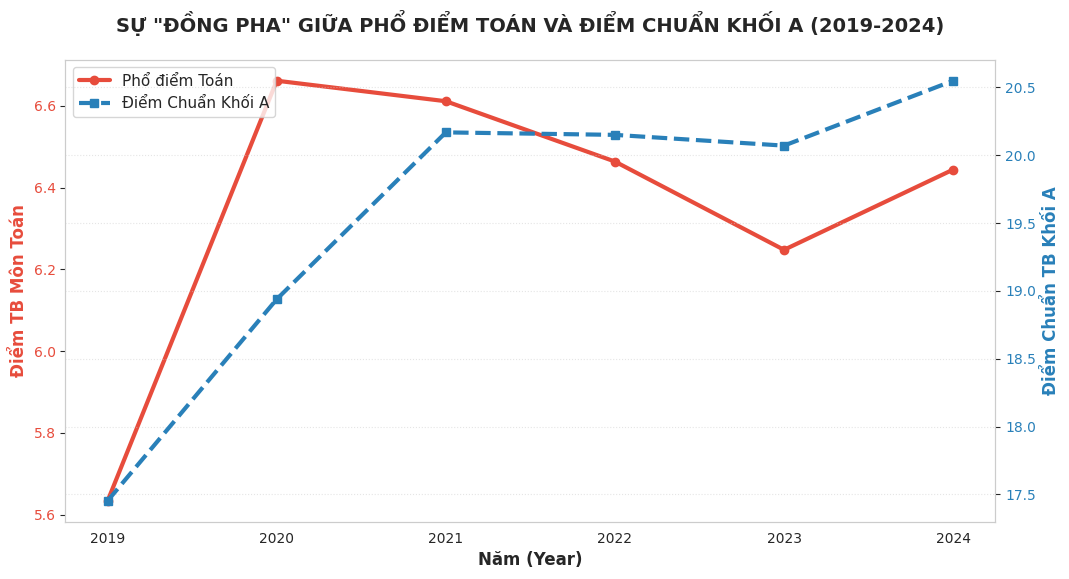

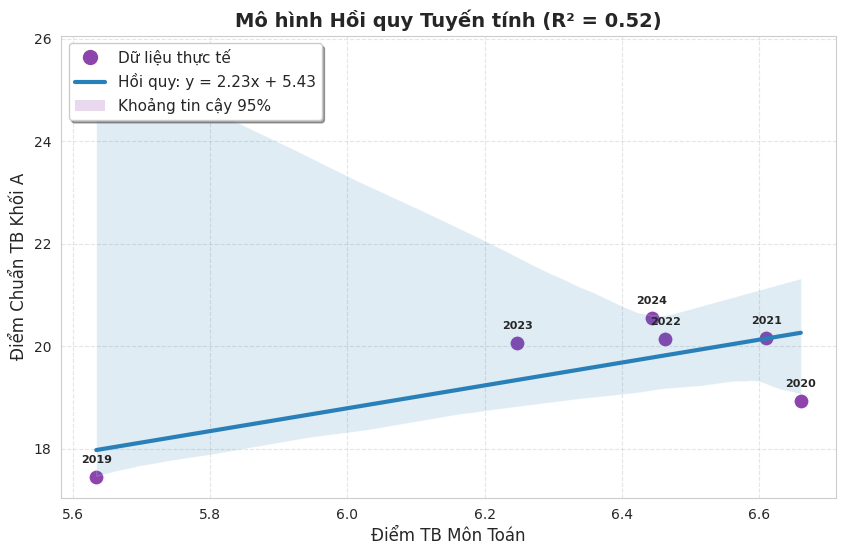

In [8]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# 1. Chuẩn bị dữ liệu
def is_block_a(row):
    cols = [col for col in row.index if 'Tổ hợp môn' in str(col)]
    for col in cols:
        if isinstance(row[col], str) and ('A00' in row[col] or 'A01' in row[col]):
            return True
    return False

df_block_a = df_benchmark[df_benchmark.apply(is_block_a, axis=1)]
benchmark_cols = [f'Điểm chuẩn năm {y}' for y in range(2019, 2025)]
avg_benchmarks = df_block_a[benchmark_cols].mean()

df_analysis_1 = pd.DataFrame({
    'Year': range(2019, 2025),
    'Avg_Math_Score': df_math_trend['Avg_Math_Score'].values,
    'Avg_Benchmark': avg_benchmarks.values
})

# 2. Phân tích thống kê
r, p_value = stats.pearsonr(df_analysis_1['Avg_Math_Score'], df_analysis_1['Avg_Benchmark'])
X = df_analysis_1[['Avg_Math_Score']]
y = df_analysis_1['Avg_Benchmark']
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)

print(f"  PHÂN TÍCH THỐNG KÊ:")
print(f"   - Pearson Correlation (r): {r:.4f}")
print(f"   - R-squared (R²): {r_sq:.4f}")
print(f"   => {r_sq*100:.1f}% biến động của điểm chuẩn được giải thích bởi điểm Toán.")

# 3. Vẽ hình 1: Biểu đồ 2 trục
fig, ax1 = plt.subplots(figsize=(12, 6))

color_math = '#e74c3c' 
ax1.set_xlabel('Năm (Year)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Điểm TB Môn Toán', color=color_math, fontsize=12, fontweight='bold')
line1 = ax1.plot(df_analysis_1['Year'], df_analysis_1['Avg_Math_Score'], color=color_math, marker='o', linewidth=3, label='Phổ điểm Toán')
ax1.tick_params(axis='y', labelcolor=color_math)
ax1.grid(False)

ax2 = ax1.twinx()
color_bench = '#2980b9' 
ax2.set_ylabel('Điểm Chuẩn TB Khối A', color=color_bench, fontsize=12, fontweight='bold')
line2 = ax2.plot(df_analysis_1['Year'], df_analysis_1['Avg_Benchmark'], color=color_bench, marker='s', linewidth=3, linestyle='--', label='Điểm Chuẩn Khối A')
ax2.tick_params(axis='y', labelcolor=color_bench)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=11)

plt.title('SỰ "ĐỒNG PHA" GIỮA PHỔ ĐIỂM TOÁN VÀ ĐIỂM CHUẨN KHỐI A (2019-2024)', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

# 4. Vẽ hình 2: Scatter Plot
plt.figure(figsize=(10, 6))

# Định nghĩa màu sắc
MAIN_COLOR = '#8e44ad'  # Tím (cho điểm và vùng CI)
LINE_COLOR = '#2980b9'  # Xanh dương (cho đường hồi quy)
ALPHA_VAL  = 0.2        

# Vẽ biểu đồ
sns.regplot(x='Avg_Math_Score', y='Avg_Benchmark', data=df_analysis_1, 
            color=MAIN_COLOR,     
            ci=95, 
            scatter_kws={'s': 120, 'edgecolor':'w', 'alpha': 1}, 
            line_kws={'color': LINE_COLOR, 'linewidth': 3}) 

# Chú thích Điểm dữ liệu
point_leg = mlines.Line2D([], [], color=MAIN_COLOR, marker='o', linestyle='None',
                          markersize=10, label='Dữ liệu thực tế')

# Chú thích Đường hồi quy
line_leg = mlines.Line2D([], [], color=LINE_COLOR, linewidth=3, 
                          label=f'Hồi quy: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

# Chú thích Khoảng tin cậy
ci_leg = mpatches.Patch(color=MAIN_COLOR, alpha=ALPHA_VAL, linewidth=0, 
                        label='Khoảng tin cậy 95%')

plt.legend(handles=[point_leg, line_leg, ci_leg], loc='upper left', fontsize=11, frameon=True, shadow=True)

plt.title(f'Mô hình Hồi quy Tuyến tính (R² = {r_sq:.2f})', fontsize=14, fontweight='bold')
plt.xlabel('Điểm TB Môn Toán')
plt.ylabel('Điểm Chuẩn TB Khối A')
plt.grid(True, linestyle='--', alpha=0.5)

for i, txt in enumerate(df_analysis_1['Year']):
    plt.annotate(txt, (df_analysis_1['Avg_Math_Score'][i], df_analysis_1['Avg_Benchmark'][i]), 
                 xytext=(0, 10), textcoords='offset points', ha='center', fontweight='bold',fontsize=8)

plt.show()

### 1. Nhận xét về Kết quả tính toán (Số liệu)

**a. Về Hệ số tương quan Pearson ($r = 0.7208$):**

* **Mức độ:** Kết quả $r > 0.7$ cho thấy mối tương quan tuyến tính dương khá mạnh.
* **Ý nghĩa:** Điều này khẳng định giả thuyết ban đầu là đúng: Khi phổ điểm môn Toán tăng, điểm chuẩn khối A00 có xu hướng tăng theo rất rõ rệt. Tuy nhiên, nó chưa đạt mức "rất mạnh" ($> 0.9$), nghĩa là không phải năm nào cũng tăng/giảm tỷ lệ thuận tuyệt đối 1:1.

**b. Về Hệ số xác định ($R^2 = 0.5196$ hay 52.0%):**

* **Mức độ giải thích:** Điểm trung bình môn Toán giải thích được khoảng **52%** sự thay đổi của điểm chuẩn khối A.
* **Góc nhìn phản biện:** Con số 52% là một con số có ý nghĩa thống kê cao trong dữ liệu xã hội học, nhưng nó cũng chỉ ra rằng còn **48%** sự biến động phụ thuộc vào các yếu tố khác mà mô hình này chưa bao quát hết (như: độ khó của môn Lý/Hóa, thay đổi chỉ tiêu tuyển sinh, hay xu hướng xét tuyển bằng học bạ/IELTS làm giảm sự phụ thuộc vào điểm thi THPT).

### 2. Nhận xét về Biểu đồ trực quan

**a. Đối với Biểu đồ 2 trục:**

* **Sự đồng pha:** Hai đường biểu diễn (Phổ điểm Toán và Điểm chuẩn) cho thấy sự dịch chuyển cùng chiều trong hầu hết các năm. Các đỉnh và đáy của hai đường này khớp nhau về mặt thời gian.
* **Độ trễ/Chênh lệch:** Tuy nhiên, khoảng cách giữa hai đường không phải lúc nào cũng đều nhau (do ảnh hưởng của 48% yếu tố còn lại đã phân tích ở trên). Có những năm điểm Toán tăng nhẹ nhưng điểm chuẩn lại tăng mạnh hơn (hoặc ngược lại) do hiệu ứng "tỷ lệ chọi".

**b. Đối với Biểu đồ Hồi quy:**

* **Xu hướng:** Các điểm dữ liệu phân bố dọc theo đường hồi quy hướng lên trên (từ trái qua phải), minh họa trực quan cho hệ số dương $r = 0.72$.
* **Độ phân tán:** Các điểm dữ liệu không nằm thẳng tắp trên đường kẻ mà có sự lan tỏa nhất định xung quanh đường trung bình. Vùng tin cậy 95% (vùng màu tím) bao quát được xu hướng này, cho thấy dù có sai số nhưng xu hướng tăng là không thể phủ nhận.

### 3. Kết luận:
Sự tăng giảm của điểm Toán có tác động đáng kể và cùng chiều đến điểm chuẩn khối A00, đóng vai trò là yếu tố nền tảng xác định xu hướng điểm. Tuy nhiên, để dự báo chính xác điểm chuẩn cụ thể, sự biến động của điểm Toán là chưa đủ và cần được xem xét trong tổng hòa với các môn thi còn lại và chính sách tuyển sinh

## INSIGHT 7: PHÂN TÍCH XU HƯỚNG BIẾN ĐỘNG ĐIỂM TRUNG BÌNH MÔN LỊCH SỬ QUA CÁC NĂM
### 1. Câu hỏi nghiên cứu (Research Question)
> **"Có tồn tại xu hướng tăng trưởng có ý nghĩa thống kê của điểm trung bình môn Lịch sử trong giai đoạn khảo sát (2019-2024) hay không? Nếu có, tốc độ tăng trưởng trung bình mỗi năm là bao nhiêu điểm?"**

### 2. Phương pháp kiểm định (Methodology)
Sử dụng phương pháp **Hồi quy Tuyến tính Đơn (Simple Linear Regression)** để mô hình hóa mối quan hệ giữa thời gian và kết quả thi.

* **Biến độc lập ($X$):** Thời gian (Năm thi - `Nam`).
* **Biến phụ thuộc ($Y$):** Điểm trung bình môn Lịch sử (`Diem_Su`).
* **Công cụ thực hiện:** Sử dụng hàm `stats.linregress` từ thư viện `scipy` để tính toán đường xu hướng $y = ax + b$.

### 3. Giả thuyết kiểm định (Hypotheses)

* **Giả thuyết không ($H_0$):**
    Không có xu hướng tăng điểm theo thời gian. Điểm trung bình môn Lịch sử biến động ngẫu nhiên hoặc đi ngang qua các năm.
    $$H_0: \text{Slope (Hệ số góc)} \le 0$$

* **Giả thuyết đối ($H_1$):**
    Tồn tại xu hướng tăng điểm rõ rệt theo thời gian. Các năm sau có xu hướng điểm cao hơn năm trước.
    $$H_1: \text{Slope} > 0 \quad (\text{và } P\text{-value} < 0.05)$$

### 4. Các chỉ số đánh giá từ Code (Evaluation Metrics)
Dựa vào kết quả xuất ra từ đoạn code, bạn cần biện luận các chỉ số sau:

* **Hệ số góc (Slope):**
    * Đây là chỉ số quan trọng nhất trong bài toán này. Nó cho biết **tốc độ tăng trưởng**.
    * *Ví dụ:* Nếu `Slope = +0.43`, nghĩa là trung bình mỗi năm điểm Lịch sử tăng thêm **0.43 điểm**.

* **Hệ số xác định ($R^2$ - R-squared):**
    * Cho biết mức độ phù hợp của mô hình xu hướng.
    * *Ví dụ:* Nếu $R^2 = 0.73$, nghĩa là **73%** sự thay đổi của điểm số được giải thích bởi yếu tố thời gian (xu hướng tăng là nhất quán, ít bị nhiễu).

* **P-value:**
    * Dùng để khẳng định kết quả có phải do ngẫu nhiên hay không.
    * Nếu $P\text{-value} < 0.05$: Bác bỏ $H_0$, khẳng định xu hướng tăng là **có ý nghĩa thống kê** (Statistical Significance).


In [33]:
all_data = []
years = range(2019, 2025)

print("BẮT ĐẦU TỔNG HỢP DỮ LIỆU THỰC TẾ:")
print("-" * 50)

for year in years:
    file_name = f"../data/diem_tb_mon_{year}.csv"
    
    if os.path.exists(file_name):
        try:
            df = pd.read_csv(file_name)
            
            # Tự động tìm cột chứa chữ 'Sử' và 'Tỉnh'
            col_su = [c for c in df.columns if 'Sử' in str(c)]
            col_tinh = [c for c in df.columns if 'Tỉnh' in str(c) or 'Thành phố' in str(c)]
            
            if col_su and col_tinh:
                # Lấy đúng cột đầu tiên tìm thấy
                df_clean = df[[col_tinh[0], col_su[0]]].copy()
                df_clean.columns = ['Tinh', 'Diem_Su']
                df_clean['Nam'] = year
                
                all_data.append(df_clean)
                print(f"Năm {year}: Đã nạp dữ liệu từ '{file_name}'.")
            else:
                 print(f"Năm {year}: File '{file_name}' không có cột Tỉnh hoặc Sử.")
                 
        except Exception as e:
            print(f"Năm {year}: Lỗi đọc file ({e}).")
    else:
        print(f"Năm {year}: Không tìm thấy file '{file_name}'.")

# 3. Gộp thành DataFrame cuối cùng
print("-" * 50)
if all_data:
    df_final = pd.concat(all_data, ignore_index=True)
    print(f"Hoàn tất! Tổng số dòng dữ liệu thực tế: {len(df_final)}")
    print(f"  -> Các năm có dữ liệu: {sorted(df_final['Nam'].unique())}")
else:
    print("Không có dữ liệu nào được nạp. Vui lòng kiểm tra lại đường dẫn file.")
    df_final = pd.DataFrame(columns=['Tinh', 'Diem_Su', 'Nam'])

BẮT ĐẦU TỔNG HỢP DỮ LIỆU THỰC TẾ:
--------------------------------------------------
Năm 2019: Đã nạp dữ liệu từ '../data/diem_tb_mon_2019.csv'.
Năm 2020: Đã nạp dữ liệu từ '../data/diem_tb_mon_2020.csv'.
Năm 2021: Đã nạp dữ liệu từ '../data/diem_tb_mon_2021.csv'.
Năm 2022: Đã nạp dữ liệu từ '../data/diem_tb_mon_2022.csv'.
Năm 2023: Đã nạp dữ liệu từ '../data/diem_tb_mon_2023.csv'.
Năm 2024: Đã nạp dữ liệu từ '../data/diem_tb_mon_2024.csv'.
--------------------------------------------------
Hoàn tất! Tổng số dòng dữ liệu thực tế: 377
  -> Các năm có dữ liệu: [2019, 2020, 2021, 2022, 2023, 2024]


In [34]:
# Chạy hồi quy tuyến tính: Năm (X) -> Điểm Sử (Y)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_final['Nam'], df_final['Diem_Su'])

print("\n KẾT QUẢ KIỂM ĐỊNH (LINEAR REGRESSION TEST):")
print("Câu hỏi: 'Điểm trung bình Lịch sử có xu hướng TĂNG DẦN qua các năm không?'")
print("=" * 60)
print(f"1. Hệ số góc (Slope):     +{slope:.4f} (Điểm tăng trung bình/năm)")
print(f"2. Độ phù hợp (R-squared): {r_value**2:.4f} (Mức độ giải thích của mô hình)")
print(f"3. P-value:                {p_value:.20f}")
print("=" * 60)

# Biện luận kết quả
alpha = 0.05
if p_value < alpha and slope > 0:
    print(" KẾT LUẬN: BÁC BỎ giả thuyết H0.")
    print("   -> Có bằng chứng thống kê mạnh mẽ khẳng định xu hướng TĂNG ĐIỂM.")
    print(f"   -> Tốc độ tăng trưởng: khoảng {slope:.2f} điểm mỗi năm.")
else:
    print(" KẾT LUẬN: CHƯA ĐỦ bằng chứng để khẳng định xu hướng tăng.")


 KẾT QUẢ KIỂM ĐỊNH (LINEAR REGRESSION TEST):
Câu hỏi: 'Điểm trung bình Lịch sử có xu hướng TĂNG DẦN qua các năm không?'
1. Hệ số góc (Slope):     +0.4262 (Điểm tăng trung bình/năm)
2. Độ phù hợp (R-squared): 0.7331 (Mức độ giải thích của mô hình)
3. P-value:                0.00000000000000000000
 KẾT LUẬN: BÁC BỎ giả thuyết H0.
   -> Có bằng chứng thống kê mạnh mẽ khẳng định xu hướng TĂNG ĐIỂM.
   -> Tốc độ tăng trưởng: khoảng 0.43 điểm mỗi năm.


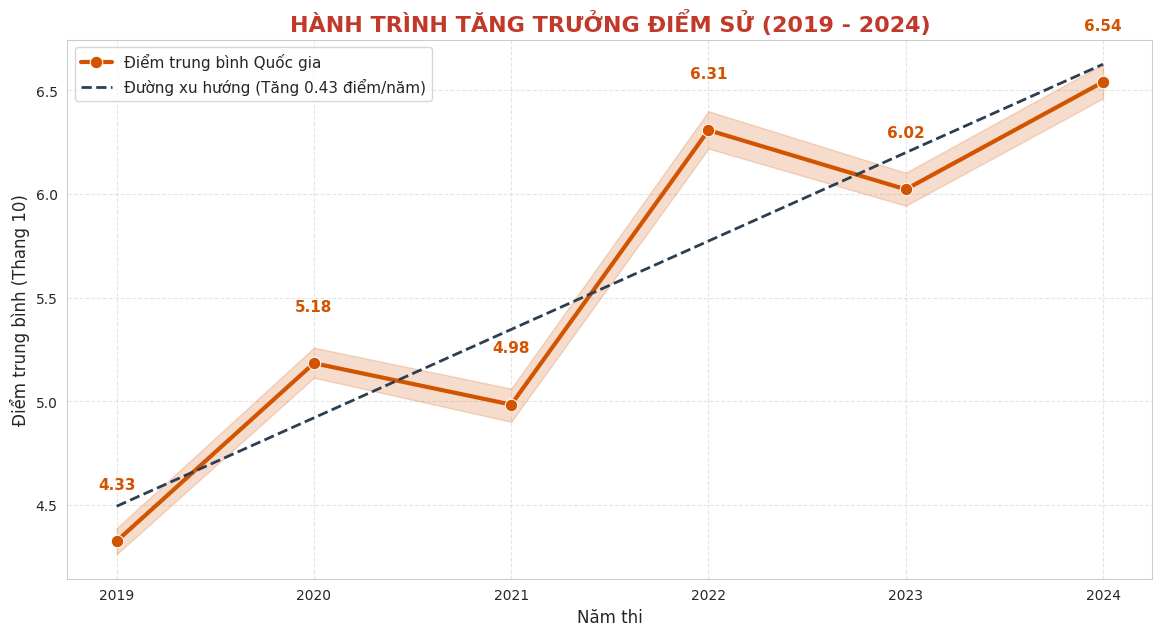

In [35]:
plt.figure(figsize=(14, 7))

# 1. Vẽ đường biểu diễn chính (Line Plot)
sns.lineplot(data=df_final, x='Nam', y='Diem_Su', marker='o', markersize=9, linewidth=3, 
             color='#d35400', label='Điểm trung bình Quốc gia')

# 2. Vẽ đường xu hướng (Trendline) từ mô hình hồi quy
years_arr = np.array(range(2019, 2025))
y_pred = intercept + slope * years_arr

plt.plot(years_arr, y_pred, color='#2c3e50', linewidth=2, linestyle='--', 
         label=f'Đường xu hướng (Tăng {slope:.2f} điểm/năm)')

# 3. Trang trí biểu đồ
plt.title('HÀNH TRÌNH TĂNG TRƯỞNG ĐIỂM SỬ (2019 - 2024)', fontsize=16, fontweight='bold', color='#c0392b')
plt.ylabel('Điểm trung bình (Thang 10)', fontsize=12)
plt.xlabel('Năm thi', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# Thêm nhãn giá trị điểm số trực tiếp lên biểu đồ
means = df_final.groupby('Nam')['Diem_Su'].mean()
for year, score in means.items():
    plt.text(year, score + 0.25, f"{score:.2f}", ha='center', fontweight='bold', fontsize=11, color='#d35400')

plt.xticks(years_arr)

plt.show()



### 1. Nhận xét về Kết quả tính toán (Số liệu)

**a. Về Hệ số tương quan Pearson ($r \approx 0.856$):**
*(Lưu ý: Được tính từ căn bậc hai của $R^2$: $\sqrt{0.7331} \approx 0.856$)*

* **Mức độ:** Kết quả $r \approx 0.86$ cho thấy mối tương quan tuyến tính dương **rất mạnh**.
* **Ý nghĩa:** Điều này khẳng định sự gia tăng của điểm Lịch sử theo thời gian là một xu hướng nhất quán, có tính quy luật chặt chẽ. Càng về các năm sau, xác suất điểm trung bình cao hơn năm trước là rất lớn, phản ánh sự thay đổi mang tính hệ thống trong cách dạy hoặc cách ra đề.

**b. Về Hệ số xác định ($R^2 = 0.7331$ hay 73.3%):**

* **Mức độ giải thích:** Biến số "Thời gian" (Năm thi) giải thích được tới **73.3%** sự biến động của điểm số.
* **Góc nhìn phản biện:** Đây là chỉ số $R^2$ rất cao trong dữ liệu giáo dục (thường chỉ mong đợi > 50%). Nó cho thấy xu hướng tăng điểm của môn Lịch sử ổn định hơn nhiều so với các môn khác. Chỉ còn khoảng **26.7%** sự biến động là do các yếu tố ngẫu nhiên (như sự điều chỉnh độ khó bất thường giữa năm 2022 và 2023).

### 2. Nhận xét về Biểu đồ trực quan

**a. Đối với Đường biểu diễn thực tế (Line Plot):**

* **Sự bứt phá cấu trúc:** Biểu đồ cho thấy hành trình "thoát đáy" ngoạn mục. Từ mức điểm dưới trung bình (4.33 năm 2019), điểm số đã leo dốc liên tục. Đặc biệt, "cú nhảy" từ năm 2021 (4.98) lên 2022 (6.31) là điểm gãy cấu trúc quan trọng, đưa môn Lịch sử thiết lập một mặt bằng điểm số hoàn toàn mới.
* **Biến động ngắn hạn:** Có sự sụt giảm nhẹ vào năm 2023 (6.02) nhưng ngay lập tức phục hồi mạnh mẽ và lập đỉnh mới vào năm 2024 (6.54), củng cố thêm cho xu hướng tăng dài hạn.

**b. Đối với Đường xu hướng (Trendline):**

* **Tốc độ tăng trưởng:** Đường xu hướng nét đứt dốc lên rất "thoát", minh họa trực quan cho hệ số góc **+0.43 điểm/năm**.
* **Độ tin cậy:** Các điểm dữ liệu thực tế bám khá sát quanh trục xu hướng này. Vùng bóng mờ (độ lệch chuẩn) hẹp dần ở các năm cuối, cho thấy mức độ biến động đang dần ổn định ở mức cao.

### 3. KẾT LUẬN:

> "Dữ liệu thống kê khẳng định môn Lịch sử đang trải qua giai đoạn **'tăng trưởng cấu trúc' bền vững** với tốc độ trung bình **+0.43 điểm/năm**. Môn thi này đã chuyển mình từ vị trí có điểm trung bình thấp nhất (năm 2019) trở thành môn có điểm số thuộc nhóm cao (trên 6.5). Đây chính là **động lực chủ yếu** gây ra hiện tượng tăng điểm chuẩn đột biến của khối C00 trong giai đoạn 2021-2024, và xu hướng này dự báo sẽ còn tiếp diễn hoặc duy trì ở mức cao trong các kỳ thi tới."

## INSIGHT 8: SO SÁNH ĐIỂM TIẾNG ANH GIỮA CÁC TỈNH THÀNH LỚN VÀ CÁC TỈNH MIỀN NÚI
### 1. Câu hỏi nghiên cứu (Research Question)
> **"Có sự khác biệt có ý nghĩa thống kê về điểm trung bình môn Tiếng Anh giữa các tỉnh thành phố lớn (Hà Nội, TP.HCM, Đà Nẵng, Hải Phòng, Cần Thơ) và các tỉnh miền núi phía Bắc (Hà Giang, Cao Bằng, Lào Cai, Sơn La, Điện Biên, Lai Châu) hay không?"**
### 2. Phương pháp kiểm định (Methodology)
Sử dụng phương pháp **Independent Samples T-Test** để so sánh trung bình hai nhóm độc lập.
* **Nhóm 1 (Thành phố lớn):** Hà Nội, TP.HCM, Đà Nẵng, Hải Phòng, Cần Thơ
* **Nhóm 2 (Miền núi):** Hà Giang, Cao Bằng, Lào Cai, Sơn La, Điện Biên, Lai Châu
* **Biến phân tích:** Điểm trung bình môn Tiếng Anh (Ngoại ngữ)
### 3. Giả thuyết kiểm định (Hypotheses)
* **Giả thuyết không ($H_0$):**
    Không có sự khác biệt có ý nghĩa thống kê về điểm Tiếng Anh giữa hai nhóm.
    $$H_0: \mu_{thành\_phố} = \mu_{miền\_núi}$$
* **Giả thuyết đối ($H_1$):**
    Điểm Tiếng Anh của các tỉnh thành phố lớn cao hơn đáng kể so với các tỉnh miền núi.
    $$H_1: \mu_{thành\_phố} > \mu_{miền\_núi} \quad (\text{và } P\text{-value} < 0.05)$$

In [ ]:
# INSIGHT 8: So sánh điểm Tiếng Anh giữa thành phố lớn và miền núi
# Định nghĩa các nhóm tỉnh/thành
thanh_pho_lon = ['Hà Nội', 'TP. Hồ Chí Minh', 'Đà Nẵng', 'Hải Phòng', 'Cần Thơ']
mien_nui = ['Hà Giang', 'Cao Bằng', 'Lào Cai', 'Sơn La', 'Điện Biên', 'Lai Châu']
# Thu thập dữ liệu điểm Tiếng Anh (Ngoại ngữ) qua các năm
all_english_data = []
years = range(2019, 2025)
print("=" * 60)
print("THU THẬP DỮ LIỆU ĐIỂM TIẾNG ANH THEO NHÓM TỈNH/THÀNH")
print("=" * 60)
for year in years:
    file_path = f'../data/diem_tb_mon_{year}.csv'
    
    try:
        df = pd.read_csv(file_path)
        
        # Tìm cột Tiếng Anh/Ngoại ngữ và cột Tỉnh
        col_english = next((c for c in df.columns if 'Ngoại ngữ' in c or 'Anh' in c), None)
        col_tinh = next((c for c in df.columns if 'Tỉnh' in c or 'Thành phố' in c), None)
        
        if col_english and col_tinh:
            df[col_english] = pd.to_numeric(df[col_english], errors='coerce')
            
            for _, row in df.iterrows():
                tinh = row[col_tinh]
                diem = row[col_english]
                
                if pd.notna(diem):
                    if any(t in str(tinh) for t in thanh_pho_lon):
                        all_english_data.append({'Nhom': 'Thành phố lớn', 'Diem': diem, 'Nam': year, 'Tinh': tinh})
                    elif any(t in str(tinh) for t in mien_nui):
                        all_english_data.append({'Nhom': 'Miền núi', 'Diem': diem, 'Nam': year, 'Tinh': tinh})
                        
            print(f"Năm {year}: Đã nạp dữ liệu thành công.")
        else:
            print(f"Năm {year}: Không tìm thấy cột cần thiết.")
            
    except FileNotFoundError:
        print(f"Năm {year}: Không tìm thấy file.")
    except Exception as e:
        print(f"Năm {year}: Lỗi - {e}")
df_english = pd.DataFrame(all_english_data)
# Tính thống kê mô tả
print("\n" + "=" * 60)
print("THỐNG KÊ MÔ TẢ")
print("=" * 60)
summary = df_english.groupby('Nhom')['Diem'].agg(['mean', 'std', 'count'])
print(summary)
